# Facebook Page Metrics

## Data cleaning

In [235]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [236]:
df=pd.read_csv('Facebook_metrics/dataset_Facebook.csv',sep = ';')

In [237]:
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [238]:
df=df.rename({'Page total likes': 'Page_total_likes', 'Post Month': 'Month','Post Weekday': 'Weekday','Post Hour': 'Hour','Lifetime Post Total Reach': 'Total_Reach','Lifetime Post Total Impressions': 'Total_Impressions','Lifetime Engaged Users': 'Engaged_Users','Lifetime Post Consumers': 'Post_Consumers','Lifetime Post Consumptions': 'Post_Consumptions','Lifetime Post Impressions by people who have liked your Page': 'Fans_Post_Impressions','Lifetime Post reach by people who like your Page': 'Fans_Post_Reach','Lifetime People who have liked your Page and engaged with your post': 'Engaged_Fans','comment':'Comments','like':'Likes','share':'Shares','Total Interactions':'Total_Interactions'}, axis=1)



In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
Page_total_likes         500 non-null int64
Type                     500 non-null object
Category                 500 non-null int64
Month                    500 non-null int64
Weekday                  500 non-null int64
Hour                     500 non-null int64
Paid                     499 non-null float64
Total_Reach              500 non-null int64
Total_Impressions        500 non-null int64
Engaged_Users            500 non-null int64
Post_Consumers           500 non-null int64
Post_Consumptions        500 non-null int64
Fans_Post_Impressions    500 non-null int64
Fans_Post_Reach          500 non-null int64
Engaged_Fans             500 non-null int64
Comments                 500 non-null int64
Likes                    499 non-null float64
Shares                   496 non-null float64
Total_Interactions       500 non-null int64
dtypes: float64(3), int64(15), object(1)
memory usag

In [240]:
df.describe()

,Page_total_likes,Category,Month,Weekday,Hour,Paid,Total_Reach,Total_Impressions,Engaged_Users,Post_Consumers,Post_Consumptions,Fans_Post_Impressions,Fans_Post_Reach,Engaged_Fans,Comments,Likes,Shares,Total_Interactions
count,500.000000,500.000000,500.000000,500.000000,500.000000,499.000000,500.00000,5.000000e+02,500.000000,500.000000,500.000000,5.000000e+02,500.000000,500.000000,500.00000,499.000000,496.000000,500.000000
mean,123194.176000,1.880000,7.038000,4.150000,7.840000,0.278557,13903.36000,2.958595e+04,920.344000,798.772000,1415.130000,1.676638e+04,6585.488000,609.986000,7.48200,177.945892,27.266129,212.120000
std,16272.813214,0.852675,3.307936,2.030701,4.368589,0.448739,22740.78789,7.680325e+04,985.016636,882.505013,2000.594118,5.979102e+04,7682.009405,612.725618,21.18091,323.398742,42.613292,380.233118
min,81370.000000,1.000000,1.000000,1.000000,1.000000,0.000000,238.00000,5.700000e+02,9.000000,9.000000,9.000000,5.670000e+02,236.000000,9.000000,0.00000,0.000000,0.000000,0.000000
25%,112676.000000,1.000000,4.000000,2.000000,3.000000,0.000000,3315.00000,5.694750e+03,393.750000,332.500000,509.250000,3.969750e+03,2181.500000,291.000000,1.00000,56.500000,10.000000,71.000000
50%,129600.000000,2.000000,7.000000,4.000000,9.000000,0.000000,5281.00000,9.051000e+03,625.500000,551.500000,851.000000,6.255500e+03,3417.000000,412.000000,3.00000,101.000000,19.000000,123.500000
75%,136393.000000,3.000000,10.000000,6.000000,11.000000,1.000000,13168.00000,2.208550e+04,1062.000000,955.500000,1463.000000,1.486050e+04,7989.000000,656.250000,7.00000,187.500000,32.250000,228.500000
max,139441.000000,3.000000,12.000000,7.000000,23.000000,1.000000,180480.00000,1.110282e+06,11452.000000,11328.000000,19779.000000,1.107833e+06,51456.000000,4376.000000,372.00000,5172.000000,790.000000,6334.000000


In [241]:
#df.head()

In [242]:
df.Paid=df.Paid.dropna().astype('int64').astype(str)

In [243]:
df['Month']=df['Month'].astype(str)
df['Weekday']=df['Weekday'].astype(str)
df['Hour']=df['Hour'].astype(str)
df['Likes']=df['Likes'].dropna().astype('int64')
df['Shares']=df['Shares'].dropna().astype('int64')

In [244]:
#df.Hour.value_counts()

In [245]:
df.drop(['Category','Post_Consumers','Post_Consumptions','Comments','Likes','Shares'],axis=1,inplace=True)

In [246]:
df=df.rename({'Page_total_likes': 'Page_likes','Total_Reach': 'Reach','Total_Impressions': 'Impressions','Fans_Post_Impressions': 'Fans_Impressions','Fans_Post_Reach': 'Fans_Reach'}, axis=1)


In [247]:
df.head()

,Page_likes,Type,Month,Weekday,Hour,Paid,Reach,Impressions,Engaged_Users,Fans_Impressions,Fans_Reach,Engaged_Fans,Total_Interactions
0,139441,Photo,12,4,3,0,2752,5091,178,3078,1640,119,100
1,139441,Status,12,3,10,0,10460,19057,1457,11710,6112,1108,164
2,139441,Photo,12,3,3,0,2413,4373,177,2812,1503,132,80
3,139441,Photo,12,2,10,1,50128,87991,2211,61027,32048,1386,1777
4,139441,Photo,12,2,3,0,7244,13594,671,6228,3200,396,393


In [25]:
import os

In [26]:
os.getcwd()

'/Users/archanavillalba/Data/Mid_Project'

In [27]:
df.to_csv('/Users/archanavillalba/Data/Mid_Project/Facebook_metrics/cleaned_data.csv', index=False)

## Descriptive statistics

In [187]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [188]:
df1=df.drop(['Fans_Impressions','Fans_Reach','Engaged_Fans'],axis=1)

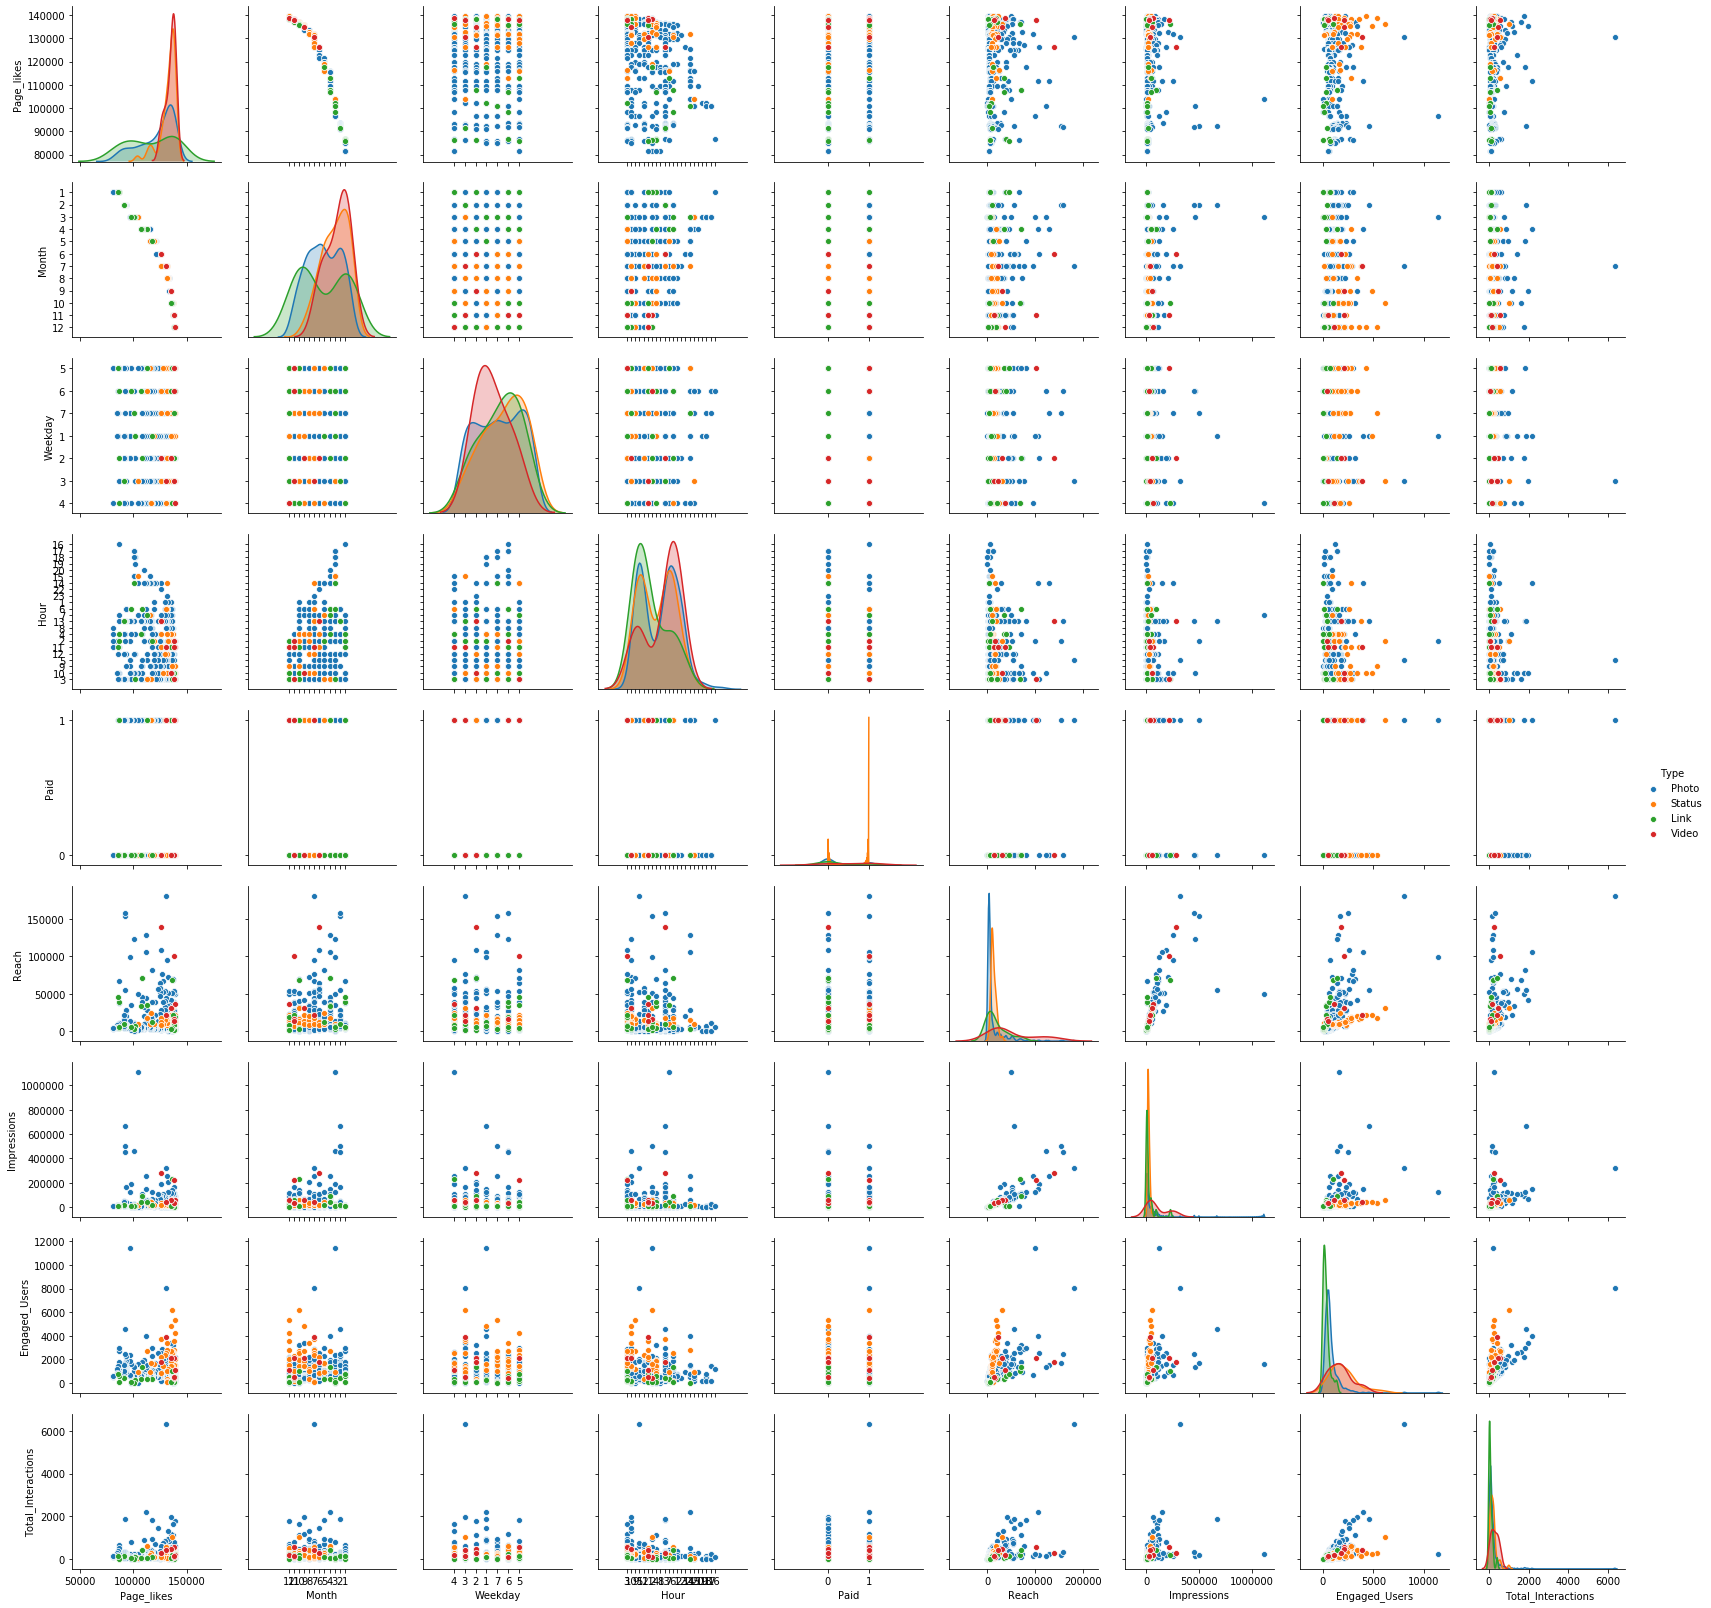

In [189]:
sns.pairplot(df1,hue='Type')

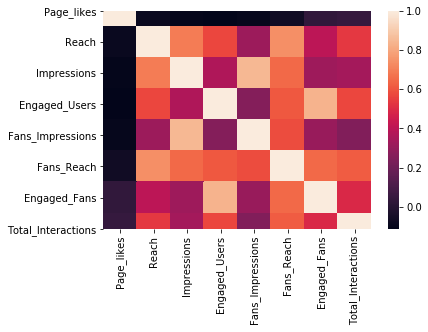

In [190]:
sns.heatmap(df.corr())

Comments:
- The more reach you have the more impressions, engaged users, interactions you have

## Organic vs Paid

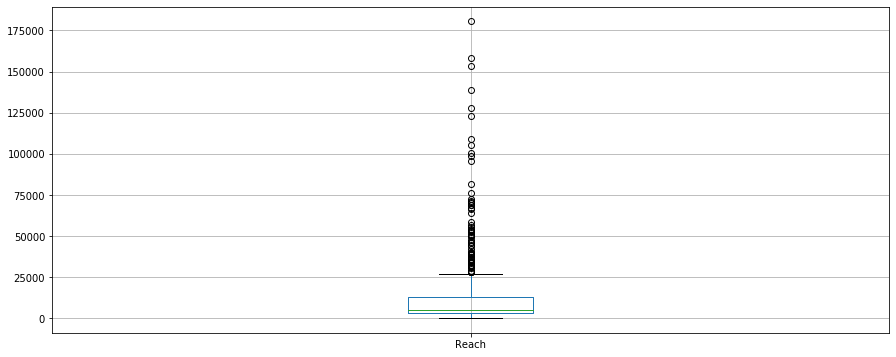

In [191]:
plt.figure(figsize=(15,6))
df.boxplot(column='Reach')

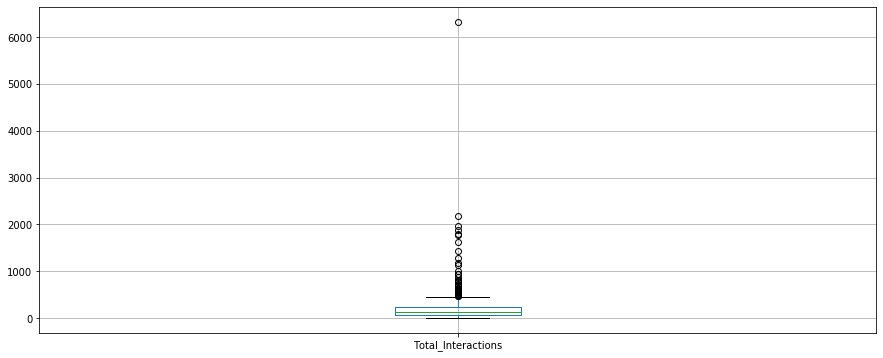

In [192]:
plt.figure(figsize=(15,6))
df.boxplot(column=['Total_Interactions'])

In [193]:
paid=df[df['Paid']=='1']
paid.shape

(139, 13)

In [194]:
organic=df[df['Paid']=='0']
organic.shape

(360, 13)

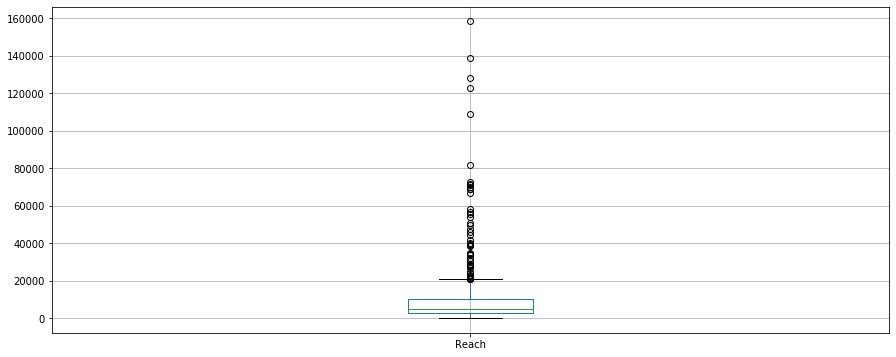

In [195]:
plt.figure(figsize=(15,6))
organic.boxplot(column='Reach')

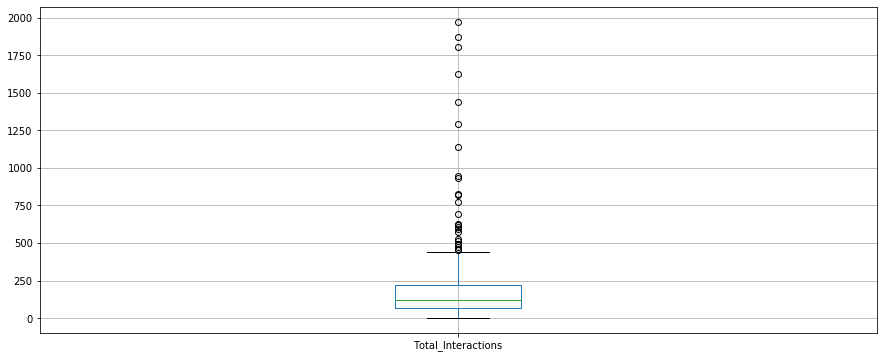

In [196]:
plt.figure(figsize=(15,6))
organic.boxplot(column='Total_Interactions')

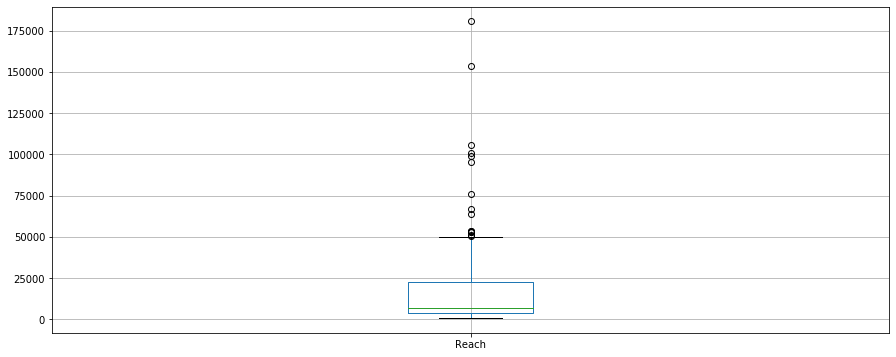

In [197]:
plt.figure(figsize=(15,6))
paid.boxplot(column='Reach')

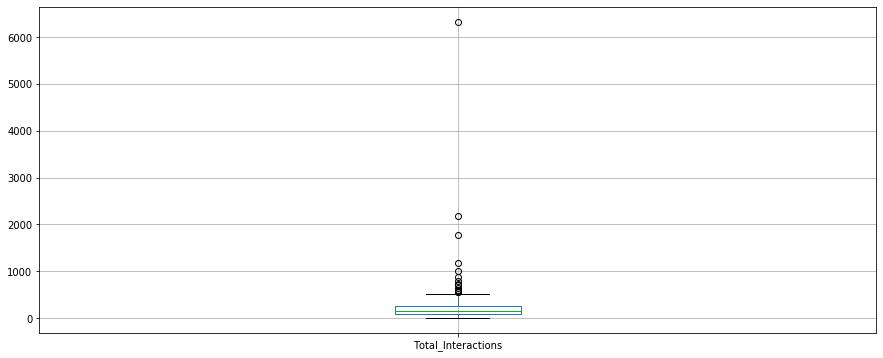

In [198]:
plt.figure(figsize=(15,6))
paid.boxplot(column='Total_Interactions')

In [199]:
paid.describe()

,Page_likes,Reach,Impressions,Engaged_Users,Fans_Impressions,Fans_Reach,Engaged_Fans,Total_Interactions
count,139.000000,139.000000,139.000000,139.00000,139.000000,139.000000,139.000000,139.000000
mean,123416.935252,19288.158273,37362.942446,1106.52518,17101.179856,7954.273381,663.971223,278.230216
std,15281.026107,28006.286388,63088.159944,1369.94605,21906.447731,8161.312895,627.651038,594.100713
min,85979.000000,813.000000,1568.000000,9.00000,1055.000000,651.000000,9.000000,0.000000
25%,113028.000000,3751.000000,6489.500000,494.50000,4920.500000,2699.000000,341.000000,83.500000
50%,129600.000000,7132.000000,12060.000000,701.00000,7682.000000,4212.000000,441.000000,158.000000
75%,135863.000000,22544.000000,41363.000000,1183.50000,21729.000000,10860.000000,706.500000,260.500000
max,139441.000000,180480.000000,497910.000000,11452.00000,160270.000000,51456.000000,4376.000000,6334.000000


In [200]:
paid.head()

,Page_likes,Type,Month,Weekday,Hour,Paid,Reach,Impressions,Engaged_Users,Fans_Impressions,Fans_Reach,Engaged_Fans,Total_Interactions
3,139441,Photo,12,2,10,1,50128,87991,2211,61027,32048,1386,1777
6,139441,Photo,12,1,3,1,11692,19479,481,15432,9328,379,279
7,139441,Photo,12,7,9,1,13720,24137,537,19728,11056,422,339
14,138414,Photo,12,4,5,1,22784,39941,887,34415,19312,684,599
17,138414,Photo,12,2,12,1,53264,111785,1706,92512,39776,1307,713


In [ ]:
## Missing values

In [306]:
df.isna().sum()

Page_likes            0
Type                  0
Month                 0
Weekday               0
Hour                  0
Paid                  0
Reach                 0
Impressions           0
Engaged_Users         0
Fans_Impressions      0
Fans_Reach            0
Engaged_Fans          0
Total_Interactions    0
Outliers              0
dtype: int64

In [ ]:
df.Paid=df.Paid.fillna(0)

In [ ]:
df.Paid=df.Paid.astype('int')

### Delete the ouliers for paid dataframe

In [201]:
paid[paid['Total_Interactions']==6334]

,Page_likes,Type,Month,Weekday,Hour,Paid,Reach,Impressions,Engaged_Users,Fans_Impressions,Fans_Reach,Engaged_Fans,Total_Interactions
244,130791,Photo,7,3,5,1,180480,319133,8072,108752,51456,3316,6334


In [202]:
paid=paid.drop([244])

In [203]:
paid.describe()

,Page_likes,Reach,Impressions,Engaged_Users,Fans_Impressions,Fans_Reach,Engaged_Fans,Total_Interactions
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000
mean,123363.500000,18120.101449,35321.130435,1056.050725,16437.043478,7639.043478,644.753623,234.347826
std,15323.655645,24475.445104,58527.322888,1238.442578,20533.827694,7292.460172,587.462076,293.105588
min,85979.000000,813.000000,1568.000000,9.000000,1055.000000,651.000000,9.000000,0.000000
25%,113028.000000,3738.500000,6482.750000,492.750000,4915.750000,2696.500000,340.500000,83.250000
50%,129600.000000,7006.000000,11957.000000,700.500000,7319.000000,4133.000000,439.500000,155.000000
75%,135938.000000,22258.000000,40341.000000,1172.000000,21329.250000,10726.000000,705.000000,252.500000
max,139441.000000,153536.000000,497910.000000,11452.000000,160270.000000,39776.000000,4376.000000,2177.000000


In [204]:
organic.describe()

,Page_likes,Reach,Impressions,Engaged_Users,Fans_Impressions,Fans_Reach,Engaged_Fans,Total_Interactions
count,360.000000,360.000000,3.600000e+02,360.000000,3.600000e+02,360.000000,360.000000,360.000000
mean,123224.344444,11851.216667,2.664509e+04,849.447222,1.667295e+04,6069.166667,589.958333,186.852778
std,16535.316052,20039.868487,8.145948e+04,779.993827,6.916731e+04,7441.549451,607.154320,250.848916
min,81370.000000,238.000000,5.700000e+02,15.000000,5.670000e+02,236.000000,15.000000,0.000000
25%,112676.000000,3108.000000,5.394000e+03,360.000000,3.688500e+03,2103.000000,268.000000,68.000000
50%,130791.000000,4903.000000,8.443000e+03,608.500000,5.804500e+03,3220.000000,403.000000,117.000000
75%,136393.000000,10256.000000,1.793625e+04,1022.250000,1.292775e+04,7021.000000,630.000000,222.500000
max,139441.000000,158208.000000,1.110282e+06,5352.000000,1.107833e+06,48368.000000,4318.000000,1974.000000


## Per Type of post

### For Paid posts

In [46]:
paid_post_type=paid.groupby(['Type']).agg({'Type':len,'Impressions':'mean','Reach':'mean','Engaged_Users':'mean','Total_Interactions':'mean'}).sort_values(by='Impressions',ascending=False)
paid_post_type

,Type,Impressions,Reach,Engaged_Users,Total_Interactions
Type,,,,,
Video,4,88518.000000,43816.000000,1893.250000,303.500000
Photo,118,34829.915254,17701.788136,955.991525,231.254237
Status,10,30452.600000,16349.200000,2398.200000,341.200000
Link,6,17631.333333,12167.833333,228.833333,71.000000


#### Focus Awareness

In [55]:
paid_post_type_reach=paid_post_type[['Impressions','Reach']]


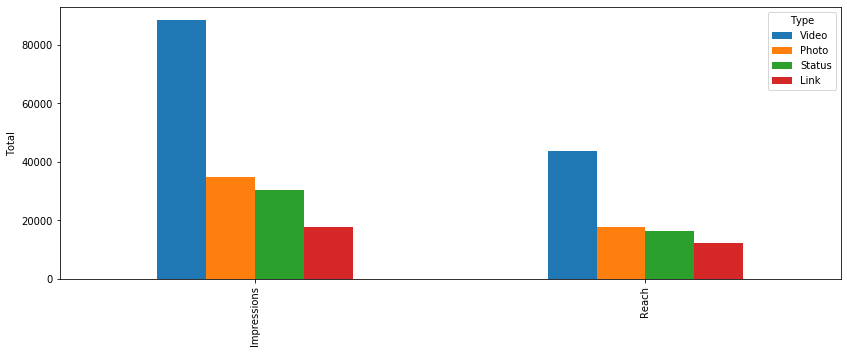

In [56]:
paid_post_type_reach.T.plot.bar(figsize=(14,5))
#plt.title('Total volume for different items per sales type',fontweight=700)
plt.ylabel('Total')
plt.show()

#### Focus Engagement

In [59]:
paid_post_type_engagement=paid_post_type[['Engaged_Users','Total_Interactions']]


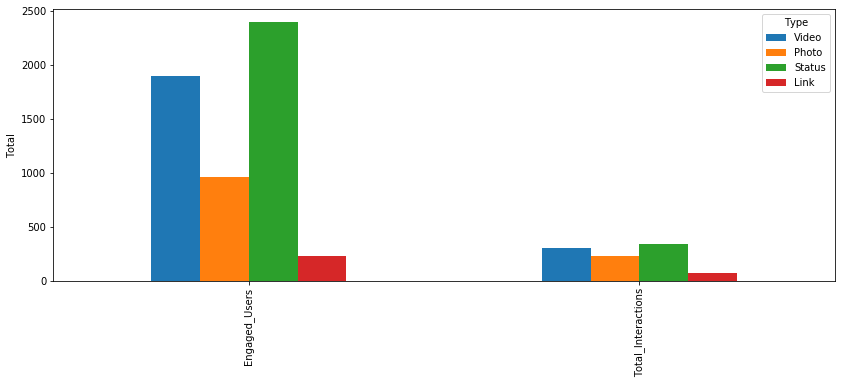

In [60]:
paid_post_type_engagement.T.plot.bar(figsize=(14,5))
#plt.title('Total volume for different items per sales type',fontweight=700)
plt.ylabel('Total')
plt.show()

### For Organic posts

In [62]:
organic_post_type=organic.groupby(['Type']).agg({'Type':len,'Impressions':'mean','Reach':'mean','Engaged_Users':'mean','Total_Interactions':'mean'}).sort_values(by='Impressions',ascending=False)
paid_post_type
organic_post_type

,Type,Impressions,Reach,Engaged_Users,Total_Interactions
Type,,,,,
Video,3,121428.333333,61058.666667,1458.666667,285.666667
Link,16,32885.750000,20935.875000,385.562500,95.812500
Photo,306,25866.996732,10860.228758,743.228758,191.248366
Status,35,22470.714286,12144.514286,1937.942857,181.571429


#### Focus Awareness

In [63]:
organic_post_type_reach=organic_post_type[['Impressions','Reach']]

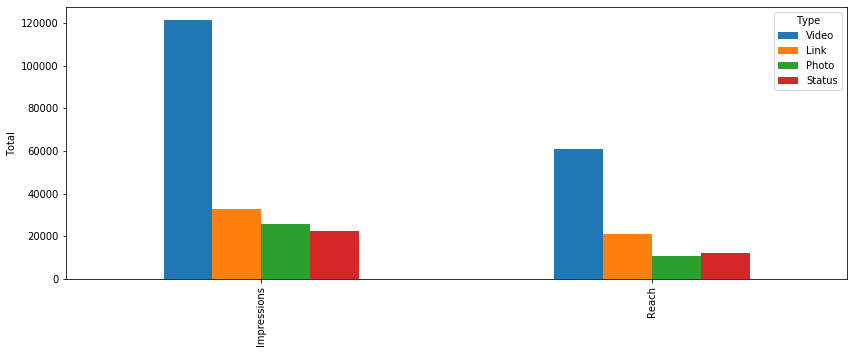

In [65]:
organic_post_type_reach.T.plot.bar(figsize=(14,5))
#plt.title('Total volume for different items per sales type',fontweight=700)
plt.ylabel('Total')
plt.show()

#### Focus Engagement

In [67]:
organic_post_type_engagement=organic_post_type[['Engaged_Users','Total_Interactions']]

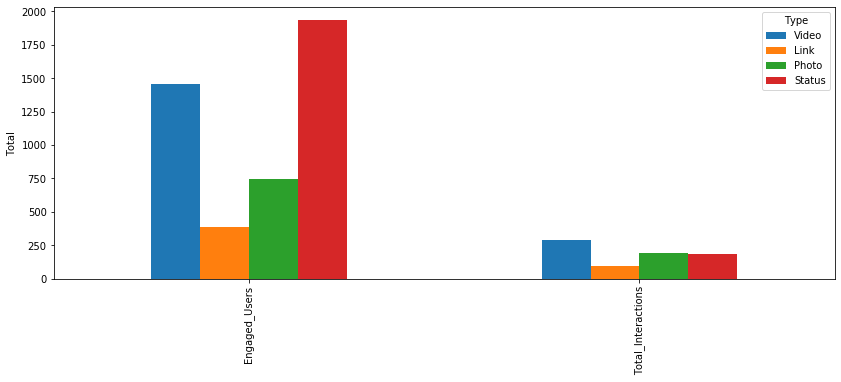

In [68]:
organic_post_type_engagement.T.plot.bar(figsize=(14,5))
#plt.title('Total volume for different items per sales type',fontweight=700)
plt.ylabel('Total')
plt.show()

## Page Like

In [1353]:
df['Total_Interactions'].sum()


#,'Reach','Engaged_Users','Total_Interactions']]]

106060

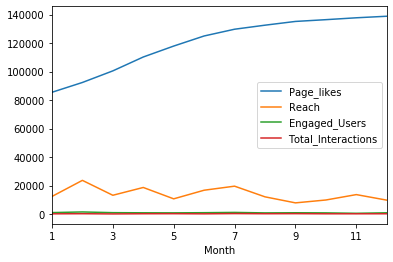

In [311]:
page_likes=df.groupby(['Month']).agg({'Page_likes':sum,'Page_likes':'mean','Reach':'mean','Engaged_Users':'mean','Total_Interactions':'mean'}).sort_values(by='Page_likes',ascending=True)

page_likes.plot()

# AB Testing by formats

## Paid posts - Awareness - Photo vs Status

In [82]:
#df_paid=df[(df['Paid']=='1')&((df['Type']=='Photo')|(df['Type']=='Status'))]
df_paid=df[(df['Paid']=='1')]
df_paid

,Page_likes,Type,Month,Weekday,Hour,Paid,Reach,Impressions,Engaged_Users,Fans_Impressions,Fans_Reach,Engaged_Fans,Total_Interactions
3,139441,Photo,12,2,10,1,50128,87991,2211,61027,32048,1386,1777
6,139441,Photo,12,1,3,1,11692,19479,481,15432,9328,379,279
7,139441,Photo,12,7,9,1,13720,24137,537,19728,11056,422,339
14,138414,Photo,12,4,5,1,22784,39941,887,34415,19312,684,599
17,138414,Photo,12,2,12,1,53264,111785,1706,92512,39776,1307,713
...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,91116,Photo,2,2,4,1,7132,12060,1004,8294,4736,576,182
475,86909,Photo,1,6,16,1,5754,9238,1179,6101,3546,420,84
476,86909,Photo,1,6,10,1,37088,10966,2728,66311,34352,2021,633
481,86491,Link,1,4,4,1,4938,7910,66,6625,3804,59,7


In [85]:
df_paid[df_paid['Total_Interactions']==6334]
df_paid=df_paid.drop([244])

In [118]:
df_stats_paid=df_paid[['Reach','Type']].groupby('Type').agg({'Reach':[len,'mean','std']})
df_stats_paid.columns=df_stats_paid.columns.droplevel(0)
df_stats_paid=df_stats_paid.sort_values(by='mean',ascending=False)
df_stats_paid=df_stats_paid.rename({'len':'number_posts','mean':'avg_reach','std':'std_reach'},axis=1)

In [171]:
df_stats_paid

,number_posts,avg_reach,std_reach
Type,,,
Video,4,43816.000000,38874.632277
Photo,118,17701.788136,25041.531196
Status,10,16349.200000,7074.797096
Link,6,12167.833333,12739.288370


In [175]:
df_paid[df_paid.Type=='Video'].Reach

29      36208
55      16416
71     100768
243     21872
Name: Reach, dtype: int64

In [115]:
df_stats_paid2=df_stats_paid.drop(['len','std'],axis=1)

In [116]:
test=df_stats_paid2.T
test

Type,Video,Photo,Status,Link
mean,43816.0,17701.788136,16349.2,12167.833333


In [99]:
?f_oneway

In [97]:
from scipy.stats import f_oneway

In [120]:
#f_oneway(df_stats_paid.mean)

## A/B with 2 variables

In [122]:
paid_df=df[(df['Paid']=='1')&((df['Type']=='Photo')|(df['Type']=='Status'))]
paid_df

,Page_likes,Type,Month,Weekday,Hour,Paid,Reach,Impressions,Engaged_Users,Fans_Impressions,Fans_Reach,Engaged_Fans,Total_Interactions
3,139441,Photo,12,2,10,1,50128,87991,2211,61027,32048,1386,1777
6,139441,Photo,12,1,3,1,11692,19479,481,15432,9328,379,279
7,139441,Photo,12,7,9,1,13720,24137,537,19728,11056,422,339
14,138414,Photo,12,4,5,1,22784,39941,887,34415,19312,684,599
17,138414,Photo,12,2,12,1,53264,111785,1706,92512,39776,1307,713
...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,91758,Photo,2,5,3,1,15880,51571,1188,47976,13560,677,238
473,91116,Photo,2,2,4,1,7132,12060,1004,8294,4736,576,182
475,86909,Photo,1,6,16,1,5754,9238,1179,6101,3546,420,84
476,86909,Photo,1,6,10,1,37088,10966,2728,66311,34352,2021,633


In [123]:
paid_df[paid_df['Total_Interactions']==6334]
paid_df=paid_df.drop([244])

In [124]:
paid_df_stats=paid_df[['Reach','Type']].groupby('Type').agg({'Reach':[len,'mean','std']})
paid_df_stats.columns=paid_df_stats.columns.droplevel(0)

In [125]:
paid_df_stats

,len,mean,std
Type,,,
Photo,118,17701.788136,25041.531196
Status,10,16349.200000,7074.797096


In [128]:

paid_df_stats=paid_df_stats.rename({'len':'number_posts','mean':'avg_reach','std':'std_reach'},axis=1)
paid_df_stats

,number_posts,avg_reach,std_reach
Type,,,
Photo,118,17701.788136,25041.531196
Status,10,16349.200000,7074.797096


In [129]:
paid_df_stats['avg_reach'].diff()[1]

-1352.5881355932179

In [130]:
paid_df_stats[['std_reach','number_posts']]
#here the std is the std of the sample

,std_reach,number_posts
Type,,
Photo,25041.531196,118
Status,7074.797096,10


In [131]:
def z_prep(x):
    return (x['std_reach']**2)/x['number_posts']

In [132]:
paid_df_stats[['std_reach','number_posts']].apply(lambda x:z_prep(x),axis=1).sum()**0.5

3212.39756985365

In [133]:
Z=paid_df_stats['avg_reach'].diff()[1]/(paid_df_stats[['std_reach','number_posts']].apply(lambda x:z_prep(x),axis=1).sum()**0.5)
Z

-0.4210525335613546

In [135]:
from scipy.stats import norm
pvalue=norm.sf(Z)

In [136]:
print(f'Z-score: {Z}\np-value: {pvalue}')

Z-score: -0.4210525335613546
p-value: 0.663141639338914


In [ ]:
Photo format is most performing one in terms of Awareness.
And first video

## Paid _Engagement - Status vs Video

In [142]:
paid_df_eng=df[(df['Paid']=='1')&((df['Type']=='Photo')|(df['Type']=='Video'))]
#paid_df_eng

In [143]:
paid_df_eng[paid_df_eng['Total_Interactions']==6334]
paid_df_eng= paid_df_eng.drop([244])

In [146]:
paid_df_stats2=paid_df_eng[['Engaged_Users','Type']].groupby('Type').agg({'Engaged_Users':[len,'mean','std']})
paid_df_stats2.columns=paid_df_stats2.columns.droplevel(0)

In [149]:
paid_df_stats2=paid_df_stats2.rename({'len':'number_posts','mean':'avg_eng_users','std':'std_eng_users'},axis=1)
paid_df_stats2

,number_posts,avg_eng_users,std_eng_users
Type,,,
Photo,118,955.991525,1146.848938
Video,4,1893.250000,1481.166742


In [152]:
paid_df_stats2['avg_eng_users'].diff()[1]

937.2584745762712

In [154]:
def z_prep2(x):
    return (x['std_eng_users']**2)/x['number_posts']

In [155]:
paid_df_stats2[['std_eng_users','number_posts']].apply(lambda x:z_prep2(x),axis=1).sum()**0.5

748.0708665830302

In [157]:
Z=paid_df_stats2['avg_eng_users'].diff()[1]/(paid_df_stats2[['std_eng_users','number_posts']].apply(lambda x:z_prep2(x),axis=1).sum()**0.5)
Z

1.2529006494496902

In [158]:
pvalue=norm.sf(Z)

In [159]:
print(f'Z-score: {Z}\np-value: {pvalue}')

Z-score: 1.2529006494496902
p-value: 0.10512093275827211


For paid post with engagement --> Video is most performing format

## Organic > Engagement > Link/Photo

In [160]:
df_organic=df[(df['Paid']=='0')&((df['Type']=='Photo')|(df['Type']=='Link'))]
df_organic

,Page_likes,Type,Month,Weekday,Hour,Paid,Reach,Impressions,Engaged_Users,Fans_Impressions,Fans_Reach,Engaged_Fans,Total_Interactions
0,139441,Photo,12,4,3,0,2752,5091,178,3078,1640,119,100
2,139441,Photo,12,3,3,0,2413,4373,177,2812,1503,132,80
4,139441,Photo,12,2,3,0,7244,13594,671,6228,3200,396,393
9,139441,Photo,12,6,10,0,4694,8668,280,4309,2324,199,142
11,139441,Photo,12,5,10,0,3112,5590,208,3887,2174,165,106
...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,85093,Photo,1,7,10,0,5400,9218,810,5654,3230,422,176
495,85093,Photo,1,7,2,0,4684,7536,733,4750,2876,392,84
496,81370,Photo,1,5,8,0,3480,6229,537,3961,2104,301,75
497,81370,Photo,1,5,2,0,3778,7216,625,4742,2388,363,115


In [161]:
df_organic_stats=df_organic[['Reach','Type']].groupby('Type').agg({'Reach':[len,'mean','std']})
df_organic_stats.columns=df_organic_stats.columns.droplevel(0)

In [163]:
df_organic_stats=df_organic_stats.rename({'len':'number_posts','mean':'avg_reach','std':'std_reach'},axis=1)
df_organic_stats

,number_posts,avg_reach,std_reach
Type,,,
Link,16,20935.875000,23762.31402
Photo,306,10860.228758,19581.28514


In [164]:
def z_prep3(x):
    return (x['std_reach']**2)/x['number_posts']

In [165]:
Z=df_organic_stats['avg_reach'].diff()[1]/(df_organic_stats[['std_reach','number_posts']].apply(lambda x:z_prep3(x),axis=1).sum()**0.5)
Z

-1.666739899524772

In [166]:
pvalue=norm.sf(Z)

In [167]:
print(f'Z-score: {Z}\np-value: {pvalue}')

Z-score: -1.666739899524772
p-value: 0.9522169322778026


In [ ]:
**********************************************************************************************************************
Paid posts:

For Brand awareness objective the most performing formats are :
1. Video very largely
2. Photo

For Brand consideration purpose / engagement with the brand:
1. Status
2. Video


Organic posts:

For Brand awareness objective the most performing formats are :
1. Video
2. Link

For Brand consideration purpose / engagement with the brand:
1. Status
2. video


**********************************************************************************************************************

# REGRESSION

In [249]:
from statsmodels.formula.api import ols

In [286]:
#df.head()

In [287]:
#df[df['Total_Interactions']==6334]

In [210]:
#Drop the huge outlier 
#df.drop(df.loc[df['Total_Interactions']==6334].index,inplace=True)

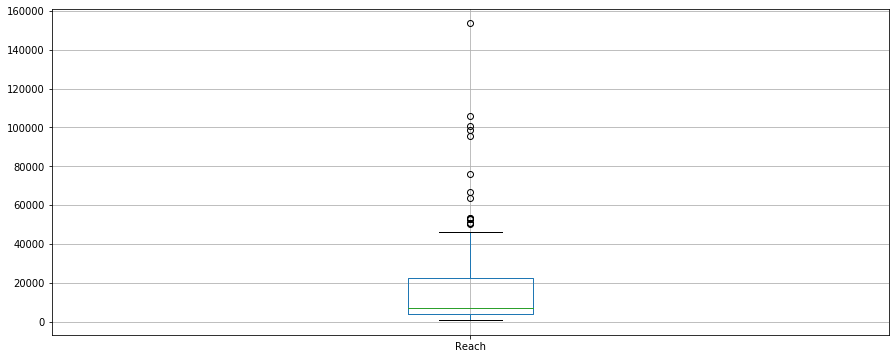

In [251]:
plt.figure(figsize=(15,6))
paid.boxplot(column='Reach')

In [252]:
q1=df['Reach'].quantile(0.25)
q3=df['Reach'].quantile(0.75)

cutoff=(q3-q1)*1.6
lbound=q1-cutoff
ubound=q3+cutoff
(lbound,ubound)

#Q1 = df['nb'].quantile(0.25)
#Q3 = df['nb'].quantile(0.75)
#IQR = Q3 - Q1

(-12449.800000000001, 28932.800000000003)

In [267]:
df['Outliers'] = '0'

In [284]:
df['Outliers']=df.Reach.apply(lambda x: 1 if x>28932 else 0)

In [285]:
df['Outliers'].value_counts()

0    437
1     63
Name: Outliers, dtype: int64

In [330]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
Page_likes            500 non-null int64
Type                  500 non-null object
Month                 500 non-null object
Weekday               500 non-null object
Hour                  500 non-null object
Paid                  500 non-null int64
Reach                 500 non-null int64
Impressions           500 non-null int64
Engaged_Users         500 non-null int64
Fans_Impressions      500 non-null int64
Fans_Reach            500 non-null int64
Engaged_Fans          500 non-null int64
Total_Interactions    500 non-null int64
Outliers              500 non-null int64
dtypes: int64(10), object(4)
memory usage: 54.8+ KB


### Create Dummies

In [797]:
df_dummies=pd.get_dummies(data=df, columns=['Paid','Outliers','Type'], drop_first=True)
df_dummies.head()

,Page_likes,Month,Weekday,Hour,Reach,Impressions,Engaged_Users,Fans_Impressions,Fans_Reach,Engaged_Fans,Total_Interactions,Paid_1,Outliers_1,Type_Photo,Type_Status,Type_Video
0,139441,12,4,3,2752,5091,178,3078,1640,119,100,0,0,1,0,0
1,139441,12,3,10,10460,19057,1457,11710,6112,1108,164,0,0,0,1,0
2,139441,12,3,3,2413,4373,177,2812,1503,132,80,0,0,1,0,0
3,139441,12,2,10,50128,87991,2211,61027,32048,1386,1777,1,1,1,0,0
4,139441,12,2,3,7244,13594,671,6228,3200,396,393,0,0,1,0,0


In [798]:
df_dummies.shape

(500, 16)

In [799]:
df_dummies.corr().Reach

Page_likes           -0.083245
Reach                 1.000000
Impressions           0.694926
Engaged_Users         0.570629
Fans_Impressions      0.322254
Fans_Reach            0.743053
Engaged_Fans          0.400756
Total_Interactions    0.538597
Paid_1                0.147080
Outliers_1            0.807943
Type_Photo           -0.080852
Type_Status          -0.011413
Type_Video            0.195655
Name: Reach, dtype: float64

In [402]:
### Regression

In [403]:
from scipy.stats import linregress
import statsmodels.api as sm

In [419]:
y=df_dummies.Reach
X=df_dummies.drop(['Reach','Weekday','Hour','Month','Page_likes','Type_Status','Type_Video','Paid_1'],axis=1)

#'Page_likes','Type_Link','Type_Status','Type_Video'

In [420]:
from statsmodels.tools.tools import add_constant
X=add_constant(X)

In [421]:
model=sm.OLS(y,X)
model_fit=model.fit()
model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Reach   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     1481.
Date:                Thu, 21 Nov 2019   Prob (F-statistic):               0.00
Time:                        15:28:30   Log-Likelihood:                -4918.9
No. Observations:                 500   AIC:                             9856.
Df Residuals:                     491   BIC:                             9894.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2296.3302    727.317      3.157      0.002     867.293    3725.367
Impressions            0.2976      0.006     47.828      0.000       0.285       0.310
Engaged_Users          6.0104      0.434     13.859      0.000       5.158       6.862
Fans_Impressions      -0.3219      0.007    -43.221      0.000      -0.337      -0.307
Fans_Reach             1.2678      0.061     20.944      0.000       1.149       1.387
Engaged_Fans          -9.3801      0.759    -12.357      0.000     -10.872      -7.889
Total_Interactions     2.4035      0.756      3.179      0.002       0.918       3.889
Outliers_1          1.224e+04   1035.081     11.824      0.000    1.02e+04    1.43e+04
Type_Photo         -2359.3854    664.736     -3.549      0.000   -3665.464   -1053.307
==============================================================================
Omnibus:                      205.321   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4386.336
Skew:                           1.252   Prob(JB):                         0.00
Kurtosis:                      17.292   Cond. No.                     5.15e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.15e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Linearity

In [422]:
y_hat=model.predict(model_fit.params)

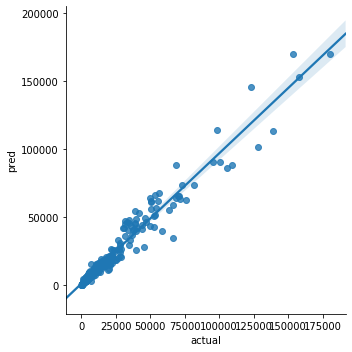

In [423]:
pred_comparaison=pd.DataFrame([y,y_hat],index=['actual','pred']).T


sns.lmplot(x='actual',y='pred',data=pred_comparaison,fit_reg=True)

In [424]:
?sns.lmplot

In [425]:
df.describe()

,Page_likes,Paid,Reach,Impressions,Engaged_Users,Fans_Impressions,Fans_Reach,Engaged_Fans,Total_Interactions,Outliers
count,500.000000,500.000000,500.00000,5.000000e+02,500.000000,5.000000e+02,500.000000,500.000000,500.000000,500.000000
mean,123194.176000,0.278000,13903.36000,2.958595e+04,920.344000,1.676638e+04,6585.488000,609.986000,212.120000,0.126000
std,16272.813214,0.448462,22740.78789,7.680325e+04,985.016636,5.979102e+04,7682.009405,612.725618,380.233118,0.332182
min,81370.000000,0.000000,238.00000,5.700000e+02,9.000000,5.670000e+02,236.000000,9.000000,0.000000,0.000000
25%,112676.000000,0.000000,3315.00000,5.694750e+03,393.750000,3.969750e+03,2181.500000,291.000000,71.000000,0.000000
50%,129600.000000,0.000000,5281.00000,9.051000e+03,625.500000,6.255500e+03,3417.000000,412.000000,123.500000,0.000000
75%,136393.000000,1.000000,13168.00000,2.208550e+04,1062.000000,1.486050e+04,7989.000000,656.250000,228.500000,0.000000
max,139441.000000,1.000000,180480.00000,1.110282e+06,11452.000000,1.107833e+06,51456.000000,4376.000000,6334.000000,1.000000


In [426]:
from statsmodels.stats.diagnostic import linear_harvey_collier
linear_harvey_collier(model_fit)

LinAlgError: Singular matrix

### Normality of residuals

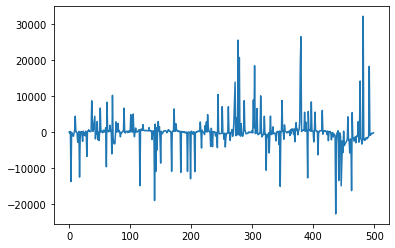

In [427]:
plt.plot(model_fit.resid)

In [428]:
model_fit.resid.mean()

1.088938006432727e-11

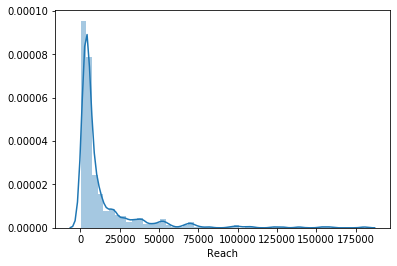

In [429]:
sns.distplot(y) 

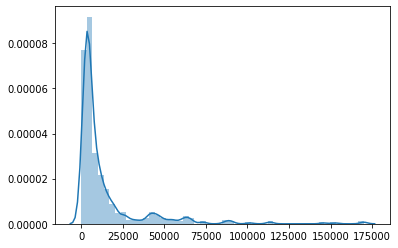

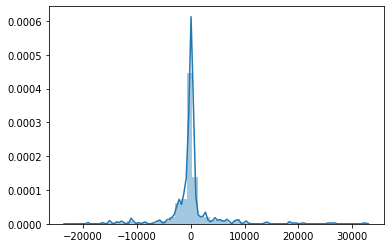

In [431]:
sns.distplot(model_fit.resid)

In [432]:
from scipy.stats import kstest

kstest(model_fit.resid,'norm')

KstestResult(statistic=0.5399959527599034, pvalue=5.421896042834875e-137)

### Multicollinearity

In [434]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

In [437]:
qqq=X.drop(['const'],axis=1)
pd.Series([VIF(qqq.values,i) for i in range(qqq.shape[1])],index=qqq.columns)

Impressions           6.218543
Engaged_Users         8.150843
Fans_Impressions      4.962742
Fans_Reach            8.689692
Engaged_Fans          8.992190
Total_Interactions    2.422917
Outliers_1            3.180045
Type_Photo            1.592821
dtype: float64

In [ ]:
Everything seems to be fine cause all smaller than 10

### Boxcox

In [438]:
from scipy.stats import boxcox

In [440]:
#boxcox(y)

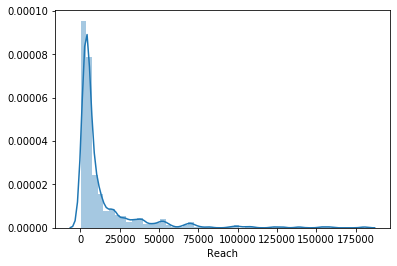

In [441]:
sns.distplot(y)

In [442]:
y1,fit_lambda=boxcox(y)

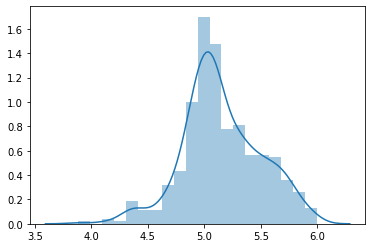

In [443]:
sns.distplot(y1)

In [444]:
fit_lambda

-0.13359524584616853

In [ ]:
#### Test with log(y)

In [445]:
y2=np.log(y)

In [447]:
model=sm.OLS(y2,X.drop('Engaged_Fans',axis=1))
model_fit=model.fit()
model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Reach   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     209.8
Date:                Thu, 21 Nov 2019   Prob (F-statistic):          2.75e-143
Time:                        15:48:45   Log-Likelihood:                -429.90
No. Observations:                 500   AIC:                             875.8
Df Residuals:                     492   BIC:                             909.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  8.1911      0.086     95.584      0.000       8.023       8.359
Impressions         6.352e-06   7.72e-07      8.227      0.000    4.84e-06    7.87e-06
Engaged_Users          0.0002   3.64e-05      5.248      0.000       0.000       0.000
Fans_Impressions   -9.118e-06   9.31e-07     -9.795      0.000   -1.09e-05   -7.29e-06
Fans_Reach          9.498e-05   7.01e-06     13.545      0.000    8.12e-05       0.000
Total_Interactions    -0.0003   9.52e-05     -3.594      0.000      -0.001      -0.000
Outliers_1             0.5091      0.126      4.029      0.000       0.261       0.757
Type_Photo            -0.2505      0.079     -3.183      0.002      -0.405      -0.096
==============================================================================
Omnibus:                       51.321   Durbin-Watson:                   1.536
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.090
Skew:                          -0.595   Prob(JB):                     2.50e-23
Kurtosis:                       4.892   Cond. No.                     5.14e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.14e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

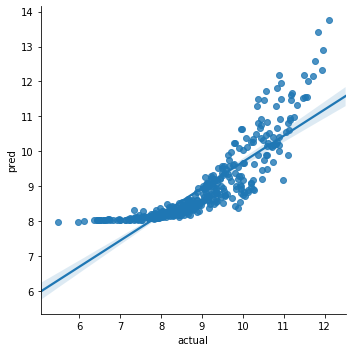

In [448]:
y_hat=model.predict(model_fit.params)
pred_comparaison=pd.DataFrame([y2,y_hat],index=['actual','pred']).T
sns.lmplot(x='actual',y='pred',data=pred_comparaison)

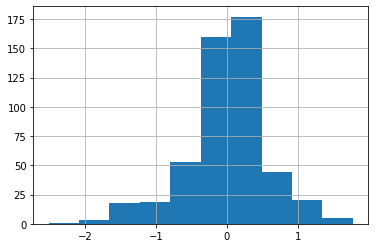

In [449]:
model_fit.resid.hist()

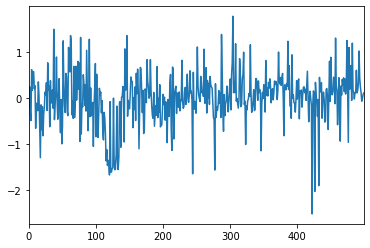

In [450]:
model_fit.resid.plot()

In [451]:
kstest(model_fit.resid,'norm')

KstestResult(statistic=0.1845139736195541, pvalue=2.2598076530400175e-15)

### With outliers droping



In [639]:
#Dropping the outliers
df_noutliers=df.drop(df.loc[df['Reach']>28932].index)

#Drop outliers column
df_noutliers=df_noutliers.drop('Outliers',axis=1)

In [640]:
#Adding dummies

df_dummies1=pd.get_dummies(data=df_noutliers, columns=['Paid','Type'], drop_first=True)
df_dummies1.describe()

,Page_likes,Reach,Impressions,Engaged_Users,Fans_Impressions,Fans_Reach,Engaged_Fans,Total_Interactions,Paid_1,Type_Photo,Type_Status,Type_Video
count,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000
mean,123526.514874,6934.187643,12919.842105,757.064073,8722.521739,4502.498856,532.892449,150.043478,0.254005,0.855835,0.100686,0.006865
std,16267.269802,6196.520556,14227.679162,675.822052,10735.432716,4003.455549,544.939930,132.488672,0.435799,0.351659,0.301258,0.082665
min,81370.000000,238.000000,570.000000,9.000000,567.000000,236.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,115368.000000,3046.000000,5318.000000,371.000000,3708.000000,2100.000000,279.000000,68.000000,0.000000,1.000000,0.000000,0.000000
50%,130791.000000,4644.000000,8070.000000,577.000000,5503.000000,3106.000000,392.000000,115.000000,0.000000,1.000000,0.000000,0.000000
75%,136393.000000,8728.000000,14986.000000,895.000000,9562.000000,5296.000000,546.000000,202.000000,1.000000,1.000000,0.000000,0.000000
max,139441.000000,28880.000000,162816.000000,5352.000000,160270.000000,25424.000000,4318.000000,1174.000000,1.000000,1.000000,1.000000,1.000000


In [641]:
df_dummies1.drop(['Month','Weekday','Hour'],axis=1,inplace=True)

In [660]:
y4=df_dummies1.Reach
X1=df_dummies1.drop(['Reach','Total_Interactions','Paid_1','Type_Status','Type_Photo','Type_Video'],axis=1)


In [661]:
from statsmodels.tools.tools import add_constant
X1=add_constant(X1)

In [662]:
model1=sm.OLS(y4,X1)
model_fit1=model1.fit()
model_fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Reach   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     2130.
Date:                Thu, 21 Nov 2019   Prob (F-statistic):          3.56e-316
Time:                        16:57:25   Log-Likelihood:                -3687.0
No. Observations:                 437   AIC:                             7388.
Df Residuals:                     430   BIC:                             7417.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1326.7630    519.667     -2.553      0.011   -2348.167    -305.359
Page_likes           0.0095      0.004      2.371      0.018       0.002       0.017
Impressions          0.4489      0.009     49.627      0.000       0.431       0.467
Engaged_Users        2.6192      0.313      8.360      0.000       2.003       3.235
Fans_Impressions    -0.5092      0.013    -38.597      0.000      -0.535      -0.483
Fans_Reach           1.2239      0.032     38.061      0.000       1.161       1.287
Engaged_Fans        -3.3047      0.401     -8.237      0.000      -4.093      -2.516
==============================================================================
Omnibus:                      167.479   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5209.960
Skew:                           0.978   Prob(JB):                         0.00
Kurtosis:                      19.802   Cond. No.                     1.21e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

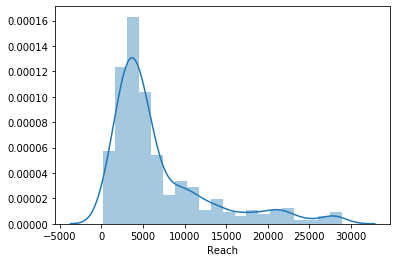

In [663]:
sns.distplot(y4)

In [664]:
### Linearity
y_hat1=model1.predict(model_fit1.params)

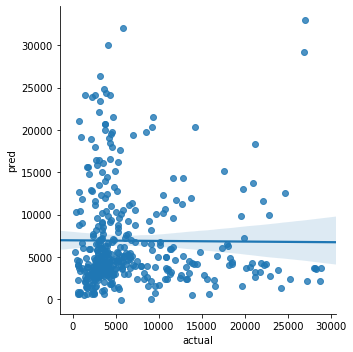

In [665]:
pred_comparaison=pd.DataFrame([y4,y_hat1],index=['actual','pred']).T


sns.lmplot(x='actual',y='pred',data=pred_comparaison,fit_reg=True)

In [666]:
from statsmodels.stats.diagnostic import linear_harvey_collier
linear_harvey_collier(model_fit)

Ttest_1sampResult(statistic=nan, pvalue=nan)

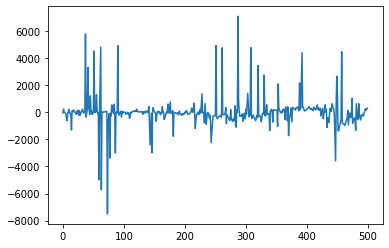

In [667]:
#Normality
plt.plot(model_fit1.resid)

In [668]:
model_fit1.resid.mean()

-1.2233432167096733e-11

In [669]:
kstest(model_fit1.resid,'norm')

KstestResult(statistic=0.5364775465117173, pvalue=4.082593184714766e-118)

In [ ]:
# With standard scaler

In [800]:
df_dummies

,Page_likes,Month,Weekday,Hour,Reach,Impressions,Engaged_Users,Fans_Impressions,Fans_Reach,Engaged_Fans,Total_Interactions,Paid_1,Outliers_1,Type_Photo,Type_Status,Type_Video
0,139441,12,4,3,2752,5091,178,3078,1640,119,100,0,0,1,0,0
1,139441,12,3,10,10460,19057,1457,11710,6112,1108,164,0,0,0,1,0
2,139441,12,3,3,2413,4373,177,2812,1503,132,80,0,0,1,0,0
3,139441,12,2,10,50128,87991,2211,61027,32048,1386,1777,1,1,1,0,0
4,139441,12,2,3,7244,13594,671,6228,3200,396,393,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,85093,1,7,2,4684,7536,733,4750,2876,392,84,0,0,1,0,0
496,81370,1,5,8,3480,6229,537,3961,2104,301,75,0,0,1,0,0
497,81370,1,5,2,3778,7216,625,4742,2388,363,115,0,0,1,0,0
498,81370,1,4,11,4156,7564,626,4534,2452,370,136,0,0,1,0,0


In [801]:
df_dummies.describe()

,Page_likes,Reach,Impressions,Engaged_Users,Fans_Impressions,Fans_Reach,Engaged_Fans,Total_Interactions,Paid_1,Outliers_1,Type_Photo,Type_Status,Type_Video
count,500.000000,500.00000,5.000000e+02,500.000000,5.000000e+02,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,123194.176000,13903.36000,2.958595e+04,920.344000,1.676638e+04,6585.488000,609.986000,212.120000,0.278000,0.126000,0.852000,0.090000,0.014000
std,16272.813214,22740.78789,7.680325e+04,985.016636,5.979102e+04,7682.009405,612.725618,380.233118,0.448462,0.332182,0.355456,0.286468,0.117608
min,81370.000000,238.00000,5.700000e+02,9.000000,5.670000e+02,236.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,112676.000000,3315.00000,5.694750e+03,393.750000,3.969750e+03,2181.500000,291.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,129600.000000,5281.00000,9.051000e+03,625.500000,6.255500e+03,3417.000000,412.000000,123.500000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,136393.000000,13168.00000,2.208550e+04,1062.000000,1.486050e+04,7989.000000,656.250000,228.500000,1.000000,0.000000,1.000000,0.000000,0.000000
max,139441.000000,180480.00000,1.110282e+06,11452.000000,1.107833e+06,51456.000000,4376.000000,6334.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [802]:
#reach_avg=df_dummies.Reach.mean()
#reach_std=df_dummies.Reach.std()

#reach_min=df_dummies.Reach.min()
#reach_max=df_dummies.Reach.max()

#imp_min=df_dummies.Impressions.min()
#imp_max=df_dummies.Impressions.max()

#eng_users_min=df_dummies.Engaged_Users.min()
#eng_users_max=df_dummies.Engaged_Users.max()

In [803]:
#df_dummies.Reach.apply(lambda x: (x-reach_min)/(reach_max-reach_min))

#df['Outliers']=df.Reach.apply(lambda x: 1 if x>28932 else 0)

In [805]:
df_dummies.Reach.value_counts()

3322     2
13544    2
677      2
3754     2
9528     2
        ..
25248    1
44288    1
4770     1
2723     1
4096     1
Name: Reach, Length: 485, dtype: int64

In [806]:
df_dummies.describe()

,Page_likes,Reach,Impressions,Engaged_Users,Fans_Impressions,Fans_Reach,Engaged_Fans,Total_Interactions,Paid_1,Outliers_1,Type_Photo,Type_Status,Type_Video
count,500.000000,500.00000,5.000000e+02,500.000000,5.000000e+02,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,123194.176000,13903.36000,2.958595e+04,920.344000,1.676638e+04,6585.488000,609.986000,212.120000,0.278000,0.126000,0.852000,0.090000,0.014000
std,16272.813214,22740.78789,7.680325e+04,985.016636,5.979102e+04,7682.009405,612.725618,380.233118,0.448462,0.332182,0.355456,0.286468,0.117608
min,81370.000000,238.00000,5.700000e+02,9.000000,5.670000e+02,236.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,112676.000000,3315.00000,5.694750e+03,393.750000,3.969750e+03,2181.500000,291.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,129600.000000,5281.00000,9.051000e+03,625.500000,6.255500e+03,3417.000000,412.000000,123.500000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,136393.000000,13168.00000,2.208550e+04,1062.000000,1.486050e+04,7989.000000,656.250000,228.500000,1.000000,0.000000,1.000000,0.000000,0.000000
max,139441.000000,180480.00000,1.110282e+06,11452.000000,1.107833e+06,51456.000000,4376.000000,6334.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [722]:
df_dummies.Total_Interactions.map(np.log).hist()

NameError: name 'x' is not defined

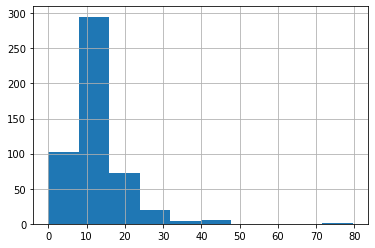

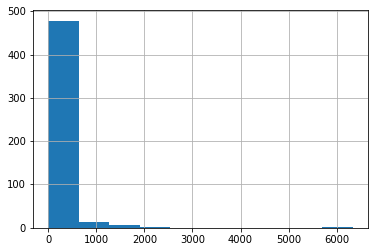

In [718]:
df_dummies.Total_Interactions.hist()

In [807]:
df_dummies.Reach=df_dummies.Reach.apply(lambda x: np.log(x))

In [808]:
df_dummies.Impressions=df_dummies.Impressions.apply(lambda x: np.log(x))
df_dummies.Engaged_Users=df_dummies.Engaged_Users.apply(lambda x: np.log(x))
df_dummies.Fans_Impressions=df_dummies.Fans_Impressions.apply(lambda x: np.log(x))
df_dummies.Fans_Reach=df_dummies.Fans_Reach.apply(lambda x: np.log(x))
df_dummies.Engaged_Fans=df_dummies.Engaged_Fans.apply(lambda x: np.log(x))
df_dummies.Total_Interactions=df_dummies.Total_Interactions.apply(lambda x: x**0.5)


In [809]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
Page_likes            500 non-null int64
Month                 500 non-null object
Weekday               500 non-null object
Hour                  500 non-null object
Reach                 500 non-null float64
Impressions           500 non-null float64
Engaged_Users         500 non-null float64
Fans_Impressions      500 non-null float64
Fans_Reach            500 non-null float64
Engaged_Fans          500 non-null float64
Total_Interactions    500 non-null float64
Paid_1                500 non-null uint8
Outliers_1            500 non-null uint8
Type_Photo            500 non-null uint8
Type_Status           500 non-null uint8
Type_Video            500 non-null uint8
dtypes: float64(7), int64(1), object(3), uint8(5)
memory usage: 45.5+ KB


In [810]:
df_dummies.describe()

,Page_likes,Reach,Impressions,Engaged_Users,Fans_Impressions,Fans_Reach,Engaged_Fans,Total_Interactions,Paid_1,Outliers_1,Type_Photo,Type_Status,Type_Video
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,123194.176000,8.805515,9.380491,6.459625,8.949730,8.314970,6.076103,12.517676,0.278000,0.126000,0.852000,0.090000,0.014000
std,16272.813214,1.142444,1.178223,0.887040,1.038936,0.955355,0.830067,7.452441,0.448462,0.332182,0.355456,0.286468,0.117608
min,81370.000000,5.472271,6.345636,2.197225,6.340359,5.463832,2.197225,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,112676.000000,8.106206,8.647299,5.975716,8.286458,7.687766,5.673323,8.426150,0.000000,0.000000,1.000000,0.000000,0.000000
50%,129600.000000,8.571871,9.110629,6.438551,8.741216,8.136517,6.021020,11.113033,0.000000,0.000000,1.000000,0.000000,0.000000
75%,136393.000000,9.485543,10.002627,6.967909,9.606430,8.985820,6.486542,15.116189,1.000000,0.000000,1.000000,0.000000,0.000000
max,139441.000000,12.103375,13.920125,9.345920,13.917916,10.848482,8.383890,79.586431,1.000000,1.000000,1.000000,1.000000,1.000000


In [1169]:
np.exp(12.103375)

180479.9553687758

In [811]:
#df_dummies=df_dummies.drop(df_dummies.iloc[[476,477,482,492]].index)
#df_dummies=df_dummies.drop(df_dummies.iloc[[73,96,110,140,146,415,463]].index)


In [812]:
df_dummies.shape

(500, 16)

In [813]:
df_stand=df_dummies

In [847]:
X6.iloc[-20:]

,const,Page_likes,Impressions,Engaged_Users,Fans_Impressions,Fans_Reach,Engaged_Fans,Outliers_1,Type_Photo
480,1.0,86909,9.937696,7.474205,9.079548,8.541691,6.582025,0,1
481,1.0,86491,8.975883,4.189655,8.798606,8.243808,4.077537,0,0
482,1.0,86491,9.154405,7.995980,9.787459,9.335033,6.685861,1,1
483,1.0,86491,9.080118,6.999422,8.653820,8.135054,6.115892,0,1
484,1.0,86491,9.032051,6.967909,8.609772,8.028781,6.079933,0,1
485,1.0,86491,9.032529,4.189655,8.859505,8.293049,4.060443,0,0
486,1.0,85979,8.990940,6.927558,8.582981,8.037220,6.086775,0,1
487,1.0,85979,8.921458,6.863803,8.442901,7.952263,5.973810,0,1
488,1.0,85979,9.766636,7.249215,9.090656,8.492080,6.492240,0,1
489,1.0,85979,8.955964,6.882437,8.503500,7.944492,6.068426,0,1


In [823]:
y6=df_stand.Reach
X6=df_stand.drop(['Reach','Month','Weekday','Hour','Paid_1','Type_Status','Total_Interactions','Type_Video'],axis=1)


In [837]:
from statsmodels.tools.tools import add_constant
X6=add_constant(X6)

model=sm.OLS(y6.iloc[:-30],X6[:-30])
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Reach   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 1.621e+04
Date:                Thu, 21 Nov 2019   Prob (F-statistic):               0.00
Time:                        18:38:29   Log-Likelihood:                 589.56
No. Observations:                 470   AIC:                            -1161.
Df Residuals:                     461   BIC:                            -1124.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1610      0.060     -2.680      0.008      -0.279      -0.043
Page_likes        9.253e-07    2.7e-07      3.426      0.001    3.95e-07    1.46e-06
Impressions          0.9249      0.011     86.894      0.000       0.904       0.946
Engaged_Users        0.1918      0.020      9.795      0.000       0.153       0.230
Fans_Impressions    -0.8769      0.018    -50.060      0.000      -0.911      -0.843
Fans_Reach           0.9796      0.017     57.328      0.000       0.946       1.013
Engaged_Fans        -0.2251      0.021    -10.672      0.000      -0.267      -0.184
Outliers_1           0.0929      0.014      6.512      0.000       0.065       0.121
Type_Photo          -0.0207      0.010     -2.023      0.044      -0.041      -0.001
==============================================================================
Omnibus:                      308.580   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11155.568
Skew:                          -2.268   Prob(JB):                         0.00
Kurtosis:                      26.432   Cond. No.                     2.41e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

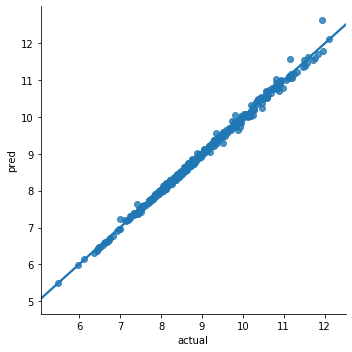

In [848]:
y_hat=model.predict(model_fit.params)
pred_comparaison=pd.DataFrame([y6[:-30],y_hat],index=['actual','pred']).T
sns.lmplot(x='actual',y='pred',data=pred_comparaison)

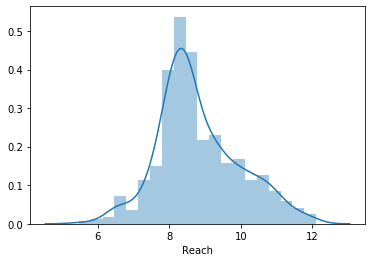

In [840]:
sns.distplot(y6)

In [841]:
from statsmodels.stats.diagnostic import linear_harvey_collier
linear_harvey_collier(model_fit)

LinAlgError: Singular matrix

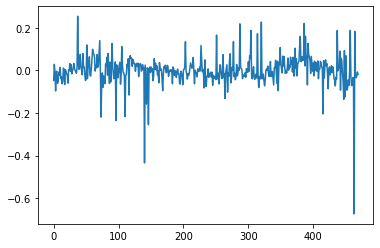

In [842]:
plt.plot(model_fit.resid)

In [843]:
model_fit.resid.mean()

7.43358698473264e-11

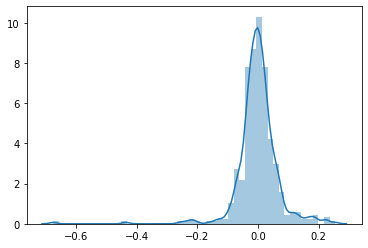

In [844]:
sns.distplot(model_fit.resid)

In [845]:
kstest(model_fit.resid,'norm')

KstestResult(statistic=0.4338156023140425, pvalue=6.228137821933503e-81)

In [846]:
?kstest

In [832]:
df_dummies.Reach.mean()

8.805515146558712

In [752]:
model_fit.resid[model_fit.resid>0.5]

304    0.539566
476    1.004057
477    0.910137
482    1.373938
492    1.171927
dtype: float64

In [784]:
model_fit.resid[model_fit.resid<-0.2]

73    -0.218910
96    -0.235337
110   -0.217708
140   -0.434188
146   -0.253127
415   -0.206776
463   -0.666696
dtype: float64

In [785]:
df_dummies.Reach.iloc[[73,96,110,140,146,415,463]]

73      9.345221
96      7.003974
110     7.422374
140    11.141746
146     9.804772
415    10.812391
463    11.941690
Name: Reach, dtype: float64

In [771]:
X6.Reach.iloc[[304,476,477,482,492]]

AttributeError: 'DataFrame' object has no attribute 'Reach'

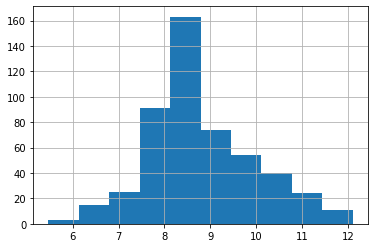

In [756]:
df_dummies.Reach.hist()

In [758]:
df_dummies.iloc[[476,477,482,492]]

,Page_likes,Month,Weekday,Hour,Reach,Impressions,Engaged_Users,Fans_Impressions,Fans_Reach,Engaged_Fans,Total_Interactions,Paid_1,Outliers_1,Type_Photo,Type_Status,Type_Video
476,86909,1,6,10,10.521049,9.302555,7.911324,11.102111,10.444416,7.611348,25.159491,1,1,1,0,0
477,86909,1,6,4,10.586584,8.978030,6.349139,9.435242,9.008958,5.117994,10.344080,0,1,0,0,0
482,86491,1,3,10,11.109219,9.154405,7.995980,9.787459,9.335033,6.685861,15.033296,0,1,1,0,0
492,85979,1,5,11,10.734656,8.666992,6.624065,9.665611,9.279866,5.393628,11.704700,0,1,0,0,0


In [1185]:
df_hours=df

In [1186]:
df_hours

,Page_likes,Type,Month,Weekday,Hour,Paid,Reach,Impressions,Engaged_Users,Fans_Impressions,...,"('Link', 'Night')out","('Photo', 'Morning')out","('Photo', 'Noon')out","('Photo', 'Night')out","('Status', 'Morning')out","('Status', 'Noon')out","('Status', 'Night')out","('Video', 'Morning')out","('Video', 'Noon')out","('Video', 'Night')out"
0,139441,Photo,12,4,3,0,2752,5091,178,3078,...,0,0,0,0,0,0,0,0,0,0
1,139441,Status,12,3,10,0,10460,19057,1457,11710,...,0,0,0,0,0,0,0,0,0,0
2,139441,Photo,12,3,3,0,2413,4373,177,2812,...,0,0,0,0,0,0,0,0,0,0
3,139441,Photo,12,2,10,1,50128,87991,2211,61027,...,0,1,0,0,0,0,0,0,0,0
4,139441,Photo,12,2,3,0,7244,13594,671,6228,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,85093,Photo,1,7,2,0,4684,7536,733,4750,...,0,0,0,0,0,0,0,0,0,0
496,81370,Photo,1,5,8,0,3480,6229,537,3961,...,0,0,0,0,0,0,0,0,0,0
497,81370,Photo,1,5,2,0,3778,7216,625,4742,...,0,0,0,0,0,0,0,0,0,0
498,81370,Photo,1,4,11,0,4156,7564,626,4534,...,0,0,0,0,0,0,0,0,0,0


In [1188]:
df_hours.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 27 columns):
Page_likes                  500 non-null int64
Type                        500 non-null object
Month                       500 non-null object
Weekday                     500 non-null object
Hour                        500 non-null int64
Paid                        500 non-null int64
Reach                       500 non-null int64
Impressions                 500 non-null int64
Engaged_Users               500 non-null int64
Fans_Impressions            500 non-null int64
Fans_Reach                  500 non-null int64
Engaged_Fans                500 non-null int64
Total_Interactions          500 non-null int64
Outliers                    500 non-null int64
Hour_cat                    500 non-null category
('Link', 'Morning')out      500 non-null int64
('Link', 'Noon')out         500 non-null int64
('Link', 'Night')out        500 non-null int64
('Photo', 'Morning')out     500 non-null in

In [1190]:
#df_hours['Hour']=df_hours['Hour'].astype('int')

0

In [1192]:
df_hours['Hour']=df_hours['Hour'].astype('int')
df_hours['Hour_cat']=df_hours['Hour_cat'].astype('str')

In [871]:
df_hours.Hour.value_counts()


3     105
10     78
13     52
11     44
2      39
4      35
9      30
12     29
6      16
5      13
14     13
7      13
8      12
15      6
1       4
17      3
18      3
22      1
16      1
19      1
20      1
23      1
Name: Hour, dtype: int64

In [894]:
#df_hours.Hour.map({'1':'Morning','14':'Afternoon','22':'Night'})


df_hours['Hour_cat']=pd.cut(df_hours.Hour,bins=[6,12,19,23],labels=['Morning','Noon','Night'])

In [895]:
df_hours.Hour_cat.value_counts()

Morning    206
Noon        78
Night        4
Name: Hour, dtype: int64

In [900]:
df_hours[['Hour','Hour_cat']]

,Hour,Hour_cat
0,3,NaN
1,10,Morning
2,3,NaN
3,10,Morning
4,3,NaN
...,...,...
495,2,NaN
496,8,Morning
497,2,NaN
498,11,Morning


In [905]:
df_hours.Hour_cat.value_counts()

Night      216
Morning    206
Noon        78
Name: Hour, dtype: int64

In [908]:
df_hours['Hour_cat']=df_hours.Hour_cat.fillna('Night')

In [909]:
df_hours

,Page_likes,Type,Month,Weekday,Hour,Paid,Reach,Impressions,Engaged_Users,Fans_Impressions,Fans_Reach,Engaged_Fans,Total_Interactions,Outliers,Hour_cat
0,139441,Photo,12,4,3,0,2752,5091,178,3078,1640,119,100,0,Night
1,139441,Status,12,3,10,0,10460,19057,1457,11710,6112,1108,164,0,Morning
2,139441,Photo,12,3,3,0,2413,4373,177,2812,1503,132,80,0,Night
3,139441,Photo,12,2,10,1,50128,87991,2211,61027,32048,1386,1777,1,Morning
4,139441,Photo,12,2,3,0,7244,13594,671,6228,3200,396,393,0,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,85093,Photo,1,7,2,0,4684,7536,733,4750,2876,392,84,0,Night
496,81370,Photo,1,5,8,0,3480,6229,537,3961,2104,301,75,0,Morning
497,81370,Photo,1,5,2,0,3778,7216,625,4742,2388,363,115,0,Night
498,81370,Photo,1,4,11,0,4156,7564,626,4534,2452,370,136,0,Morning


In [938]:
for i,j in df_hours.groupby(['Type','Hour_cat']):
    q1=j['Reach'].quantile(0.25)
    q3=j['Reach'].quantile(0.75)

    cutoff=(q3-q1)*1.6
    lbound=max(q1-cutoff,0)
    ubound=q3+cutoff
    print(lbound,ubound)
    df_hours[str(i)+'out']=j.Reach.apply(lambda x: 1 if x>ubound else -1 if x<lbound else 0)
    

0 86150.4
0 12888.650000000001
0 63893.6
0 18678.2
0 20443.4
0 24468.800000000003
674.3999999999996 26361.6
4848.0 24168.0
2744.0 18452.0
222.0 51588.0
139008.0 139008.0
0 147161.6


In [942]:
df_hours.iloc[:,-12:]=df.iloc[:,-12:].fillna(0)

In [1195]:
df_hours.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 27 columns):
Page_likes                  500 non-null int64
Type                        500 non-null object
Month                       500 non-null object
Weekday                     500 non-null object
Hour                        500 non-null int64
Paid                        500 non-null int64
Reach                       500 non-null int64
Impressions                 500 non-null int64
Engaged_Users               500 non-null int64
Fans_Impressions            500 non-null int64
Fans_Reach                  500 non-null int64
Engaged_Fans                500 non-null int64
Total_Interactions          500 non-null int64
Outliers                    500 non-null int64
Hour_cat                    500 non-null object
('Link', 'Morning')out      500 non-null int64
('Link', 'Noon')out         500 non-null int64
('Link', 'Night')out        500 non-null int64
('Photo', 'Morning')out     500 non-null int6

In [947]:
#df_hours.iloc[:,-12:]=df_hours.iloc[:,-12:].astype('int')

In [1196]:
df_hours_dum=pd.get_dummies(data=df_hours, columns=['Paid','Type','Hour_cat'], drop_first=True)
df_hours_dum.head()

,Page_likes,Month,Weekday,Hour,Reach,Impressions,Engaged_Users,Fans_Impressions,Fans_Reach,Engaged_Fans,...,"('Status', 'Night')out","('Video', 'Morning')out","('Video', 'Noon')out","('Video', 'Night')out",Paid_1,Type_Photo,Type_Status,Type_Video,Hour_cat_Night,Hour_cat_Noon
0,139441,12,4,3,2752,5091,178,3078,1640,119,...,0,0,0,0,0,1,0,0,1,0
1,139441,12,3,10,10460,19057,1457,11710,6112,1108,...,0,0,0,0,0,0,1,0,0,0
2,139441,12,3,3,2413,4373,177,2812,1503,132,...,0,0,0,0,0,1,0,0,1,0
3,139441,12,2,10,50128,87991,2211,61027,32048,1386,...,0,0,0,0,1,1,0,0,0,0
4,139441,12,2,3,7244,13594,671,6228,3200,396,...,0,0,0,0,0,1,0,0,1,0


In [1197]:
df_hours_dum=df_hours_dum.drop(['Month','Weekday','Hour'],axis=1)


In [1198]:
#df_hours_dummies.Hour_cat=df_hours_dummies.Hour_cat.astype('str')

In [1201]:
df_hours_dum=df_hours_dum.drop(['Outliers'],axis=1)


In [1204]:
df_hours_dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 26 columns):
Page_likes                  500 non-null int64
Reach                       500 non-null int64
Impressions                 500 non-null int64
Engaged_Users               500 non-null int64
Fans_Impressions            500 non-null int64
Fans_Reach                  500 non-null int64
Engaged_Fans                500 non-null int64
Total_Interactions          500 non-null int64
('Link', 'Morning')out      500 non-null int64
('Link', 'Noon')out         500 non-null int64
('Link', 'Night')out        500 non-null int64
('Photo', 'Morning')out     500 non-null int64
('Photo', 'Noon')out        500 non-null int64
('Photo', 'Night')out       500 non-null int64
('Status', 'Morning')out    500 non-null int64
('Status', 'Noon')out       500 non-null int64
('Status', 'Night')out      500 non-null int64
('Video', 'Morning')out     500 non-null int64
('Video', 'Noon')out        500 non-null int64
('

In [1205]:
df_hours_dum.Reach=df_hours_dum.Reach.apply(lambda x: np.log(x))
df_hours_dum.Impressions=df_hours_dum.Impressions.apply(lambda x: np.log(x))

df_hours_dum.Engaged_Users=df_hours_dum.Engaged_Users.apply(lambda x: np.log(x))
df_hours_dum.Fans_Impressions=df_hours_dum.Fans_Impressions.apply(lambda x: np.log(x))
df_hours_dum.Fans_Reach=df_hours_dum.Fans_Reach.apply(lambda x: np.log(x))
df_hours_dum.Engaged_Fans=df_hours_dum.Engaged_Fans.apply(lambda x: np.log(x))
df_hours_dum.Total_Interactions=df_hours_dum.Total_Interactions.apply(lambda x: x**0.5)


In [1206]:
df_hours_dum.Reach

0       7.920083
1       9.255314
2       7.788626
3      10.822335
4       8.887929
         ...    
495     8.451908
496     8.154788
497     8.236950
498     8.332308
499     8.339979
Name: Reach, Length: 500, dtype: float64

In [1212]:
df_hours_dum

,Page_likes,Reach,Impressions,Engaged_Users,Fans_Impressions,Fans_Reach,Engaged_Fans,Total_Interactions,"('Link', 'Morning')out","('Link', 'Noon')out",...,"('Status', 'Night')out","('Video', 'Morning')out","('Video', 'Noon')out","('Video', 'Night')out",Paid_1,Type_Photo,Type_Status,Type_Video,Hour_cat_Night,Hour_cat_Noon
0,139441,7.920083,8.535230,5.181784,8.032035,7.402452,4.779123,10.000000,0,0,...,0,0,0,0,0,1,0,0,1,0
1,139441,9.255314,9.855190,7.284135,9.368198,8.718009,7.010312,12.806248,0,0,...,0,0,0,0,0,0,1,0,0,0
2,139441,7.788626,8.383205,5.176150,7.941651,7.315218,4.882802,8.944272,0,0,...,0,0,0,0,0,1,0,0,1,0
3,139441,10.822335,11.384990,7.701200,11.019072,10.374990,7.234177,42.154478,0,0,...,0,0,0,0,1,1,0,0,0,0
4,139441,8.887929,9.517384,6.508769,8.736811,8.070906,5.981414,19.824228,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,85093,8.451908,8.927447,6.597146,8.465900,7.964156,5.971262,9.165151,0,0,...,0,0,0,0,0,1,0,0,1,0
496,81370,8.154788,8.736971,6.285998,8.284252,7.651596,5.707110,8.660254,0,0,...,0,0,0,0,0,1,0,0,0,0
497,81370,8.236950,8.884056,6.437752,8.464214,7.778211,5.894403,10.723805,0,0,...,0,0,0,0,0,1,0,0,1,0
498,81370,8.332308,8.931155,6.439350,8.419360,7.804659,5.913503,11.661904,0,0,...,0,0,0,0,0,1,0,0,0,0


In [1255]:
y9=df_hours_dum.Reach
X9=df_hours_dum.drop(['Reach','Total_Interactions',"('Link', 'Morning')out",'Paid_1',"('Status', 'Night')out","('Link', 'Night')out",'Type_Video',"('Video', 'Night')out",'Hour_cat_Night',"('Video', 'Morning')out","('Link', 'Noon')out","('Video', 'Noon')out",'Page_likes',"('Status', 'Morning')out","('Status', 'Noon')out",'Hour_cat_Noon'],axis=1)
X9=add_constant(X9)

In [1328]:
model=sm.OLS(y9,X9)
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Reach   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     2737.
Date:                Fri, 22 Nov 2019   Prob (F-statistic):               0.00
Time:                        16:13:20   Log-Likelihood:                 235.05
No. Observations:                 500   AIC:                            -448.1
Df Residuals:                     489   BIC:                            -401.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.3489      0.097      3.579      0.000       0.157       0.540
Impressions                 0.6992      0.019     35.938      0.000       0.661       0.737
Engaged_Users               0.4584      0.033     13.938      0.000       0.394       0.523
Fans_Impressions           -0.7348      0.038    -19.403      0.000      -0.809      -0.660
Fans_Reach                  1.0478      0.037     28.214      0.000       0.975       1.121
Engaged_Fans               -0.5008      0.038    -13.272      0.000      -0.575      -0.427
('Photo', 'Morning')out     0.3293      0.037      8.940      0.000       0.257       0.402
('Photo', 'Noon')out        0.1998      0.046      4.299      0.000       0.108       0.291
('Photo', 'Night')out       0.2375      0.038      6.170      0.000       0.162       0.313
Type_Photo                 -0.2181      0.035     -6.319      0.000      -0.286      -0.150
Type_Status                -0.1038      0.044     -2.360      0.019      -0.190      -0.017
==============================================================================
Omnibus:                      479.293   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24050.232
Skew:                           4.047   Prob(JB):                         0.00
Kurtosis:                      35.998   Cond. No.                         282.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1319]:
y_hat=model.predict(model_fit.params)

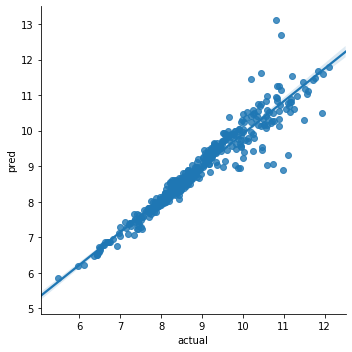

In [1320]:
pred_comparaison=pd.DataFrame([y9,y_hat],index=['actual','pred']).T
sns.lmplot(x='actual',y='pred',data=pred_comparaison,fit_reg=True)


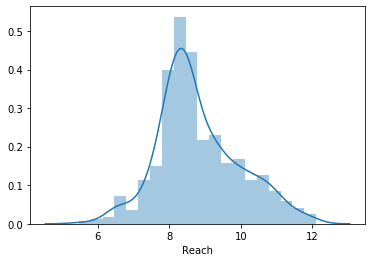

In [1321]:
sns.distplot(y9)

In [1322]:
from statsmodels.stats.diagnostic import linear_harvey_collier
linear_harvey_collier(model_fit)

Ttest_1sampResult(statistic=2.034779988292011, pvalue=0.04240430761638952)

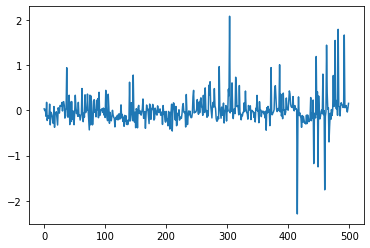

In [1323]:
plt.plot(model_fit.resid)

In [1324]:
kstest(model_fit.resid,'norm')

KstestResult(statistic=0.332132518748508, pvalue=1.1668637585627633e-49)

In [1263]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

In [1342]:
test=X9.drop(['Fans_Impressions','Engaged_Fans','Fans_Reach','Impressions','Engaged_Users'],axis=1)
pd.Series([VIF(test.values,i) for i in range(test.shape[1])],index=test.columns)

const                      17.241379
('Photo', 'Morning')out     1.018667
('Photo', 'Noon')out        1.011751
('Photo', 'Night')out       1.018667
Type_Photo                  2.352171
Type_Status                 2.322069
dtype: float64

In [1281]:
def linear_regression_assumptions(features, label, feature_names=None):
    from sklearn import datasets
    import pandas as pd
    import seaborn as sns
    import numpy as np
    import matplotlib.pyplot as plt
    """
    Tests a linear regression on the model to see if assumptions are being met
    """
    from sklearn.linear_model import LinearRegression
    
    # Setting feature names to x1, x2, x3, etc. if they are not defined
    if feature_names is None:
        feature_names = ['X'+str(feature+1) for feature in range(features.shape[1])]
    
    print('Fitting linear regression')
    # Multi-threading if the dataset is a size where doing so is beneficial
    if features.shape[0] < 100000:
        model = LinearRegression(n_jobs=-1)
    else:
        model = LinearRegression()
        
    model.fit(features, label)
    
    # Returning linear regression R^2 and coefficients before performing diagnostics
    r2 = model.score(features, label)
    print()
    print('R^2:', r2, '\n')
    print('Coefficients')
    print('-------------------------------------')
    print('Intercept:', model.intercept_)
    
    for feature in range(len(model.coef_)):
        print('{0}: {1}'.format(feature_names[feature], model.coef_[feature]))
    print('\nPerforming linear regression assumption testing')
    
    # Creating predictions and calculating residuals for assumption tests
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    def linear_assumption():
        """
        Linearity: Assumes there is a linear relationship between the predictors and
                   the response variable. If not, either a polynomial term or another
                   algorithm should be used.
        """
        print('\n=======================================================================================')
        print('Assumption 1: Linear Relationship between the Target and the Features')
        
        print('Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.')
        
        # Plotting the actual vs predicted values
        sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False, size=7)
        
        # Plotting the diagonal line
        line_coords = np.arange(df_results.min().min(), df_results.max().max())
        plt.plot(line_coords, line_coords,  # X and y points
                 color='darkorange', linestyle='--')
        plt.title('Actual vs. Predicted')
        plt.show()
        print('If non-linearity is apparent, consider adding a polynomial term')
        
        
    def normal_errors_assumption(p_value_thresh=0.05):
        """
        Normality: Assumes that the error terms are normally distributed. If they are not,
        nonlinear transformations of variables may solve this.
               
        This assumption being violated primarily causes issues with the confidence intervals
        """
        from statsmodels.stats.diagnostic import normal_ad
        print('\n=======================================================================================')
        print('Assumption 2: The error terms are normally distributed')
        print()
    
        print('Using the Anderson-Darling test for normal distribution')
        # Performing the test on the residuals
        p_value = normal_ad(df_results['Residuals'])[1]
        print('p-value from the test - below 0.05 generally means non-normal:', p_value)
    
        # Reporting the normality of the residuals
        if p_value < p_value_thresh:
            print('Residuals are not normally distributed')
        else:
            print('Residuals are normally distributed')
    
        # Plotting the residuals distribution
        plt.subplots(figsize=(12, 6))
        plt.title('Distribution of Residuals')
        sns.distplot(df_results['Residuals'])
        plt.show()
    
        print()
        if p_value > p_value_thresh:
            print('Assumption satisfied')
        else:
            print('Assumption not satisfied')
            print()
            print('Confidence intervals will likely be affected')
            print('Try performing nonlinear transformations on variables')
        
        
    def multicollinearity_assumption():
        """
        Multicollinearity: Assumes that predictors are not correlated with each other. If there is
                           correlation among the predictors, then either remove prepdictors with high
                           Variance Inflation Factor (VIF) values or perform dimensionality reduction
                           
                           This assumption being violated causes issues with interpretability of the 
                           coefficients and the standard errors of the coefficients.
        """
        from statsmodels.stats.outliers_influence import variance_inflation_factor
        print('\n=======================================================================================')
        print('Assumption 3: Little to no multicollinearity among predictors')
        
        # Plotting the heatmap
        plt.figure(figsize = (10,8))
        sns.heatmap(pd.DataFrame(features, columns=feature_names).corr(), annot=True)
        plt.title('Correlation of Variables')
        plt.show()
        
        print('Variance Inflation Factors (VIF)')
        print('> 10: An indication that multicollinearity may be present')
        print('> 100: Certain multicollinearity among the variables')
        print('-------------------------------------')
       
        # Gathering the VIF for each variable
        VIF = [variance_inflation_factor(features, i) for i in range(features.shape[1])]
        for idx, vif in enumerate(VIF):
            print('{0}: {1}'.format(feature_names[idx], vif))
        
        # Gathering and printing total cases of possible or definite multicollinearity
        possible_multicollinearity = sum([1 for vif in VIF if vif > 10])
        definite_multicollinearity = sum([1 for vif in VIF if vif > 100])
        print()
        print('{0} cases of possible multicollinearity'.format(possible_multicollinearity))
        print('{0} cases of definite multicollinearity'.format(definite_multicollinearity))
        print()
        if definite_multicollinearity == 0:
            if possible_multicollinearity == 0:
                print('Assumption satisfied')
            else:
                print('Assumption possibly satisfied')
                print()
                print('Coefficient interpretability may be problematic')
                print('Consider removing variables with a high Variance Inflation Factor (VIF)')
        else:
            print('Assumption not satisfied')
            print()
            print('Coefficient interpretability will be problematic')
            print('Consider removing variables with a high Variance Inflation Factor (VIF)')
        
        
    def autocorrelation_assumption():
        """
        Autocorrelation: Assumes that there is no autocorrelation in the residuals. If there is
                         autocorrelation, then there is a pattern that is not explained due to
                         the current value being dependent on the previous value.
                         This may be resolved by adding a lag variable of either the dependent
                         variable or some of the predictors.
        """
        from statsmodels.stats.stattools import durbin_watson
        print('\n=======================================================================================')
        print('Assumption 4: No Autocorrelation')
        print('\nPerforming Durbin-Watson Test')
        print('Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data')
        print('0 to 2< is positive autocorrelation')
        print('>2 to 4 is negative autocorrelation')
        print('-------------------------------------')
        durbinWatson = durbin_watson(df_results['Residuals'])
        print('Durbin-Watson:', durbinWatson)
        if durbinWatson < 1.5:
            print('Signs of positive autocorrelation', '\n')
            print('Assumption not satisfied', '\n')
            print('Consider adding lag variables')
        elif durbinWatson > 2.5:
            print('Signs of negative autocorrelation', '\n')
            print('Assumption not satisfied', '\n')
            print('Consider adding lag variables')
        else:
            print('Little to no autocorrelation', '\n')
            print('Assumption satisfied')
            
    def homoscedasticity_assumption():
        """
        Homoscedasticity: Assumes that the errors exhibit constant variance
        """
        print('\n=======================================================================================')
        print('Assumption 5: Homoscedasticity of Error Terms')
        print('Residuals should have relative constant variance')
        
        # Plotting the residuals
        plt.subplots(figsize=(12, 6))
        ax = plt.subplot(111)  # To remove spines
        plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
        plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
        ax.spines['right'].set_visible(False)  # Removing the right spine
        ax.spines['top'].set_visible(False)  # Removing the top spine
        plt.title('Residuals')
        plt.show() 
        print('If heteroscedasticity is apparent, confidence intervals and predictions will be affected')
        
        
    linear_assumption()
    normal_errors_assumption()
    multicollinearity_assumption()
    autocorrelation_assumption()
    homoscedasticity_assumption()

Fitting linear regression

R^2: 0.9207086670288136 

Coefficients
-------------------------------------
Intercept: 8.80551514655871
pca1: 0.5239760938481184
pca2: 0.31552937538452996

Performing linear regression assumption testing

Assumption 1: Linear Relationship between the Target and the Features
Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


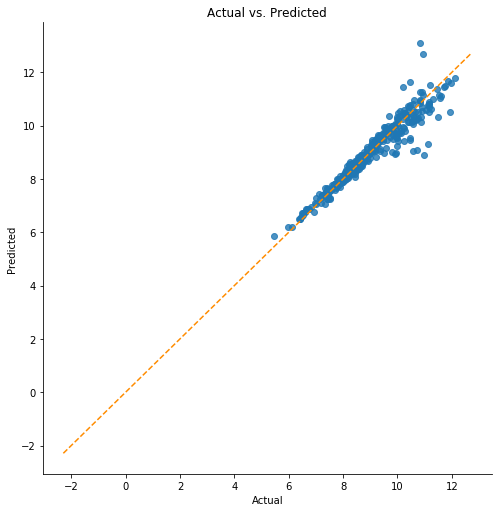

If non-linearity is apparent, consider adding a polynomial term

Assumption 2: The error terms are normally distributed

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.0
Residuals are not normally distributed


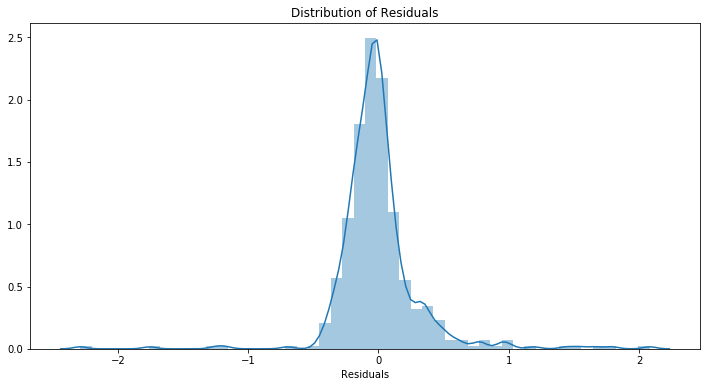


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables

Assumption 3: Little to no multicollinearity among predictors


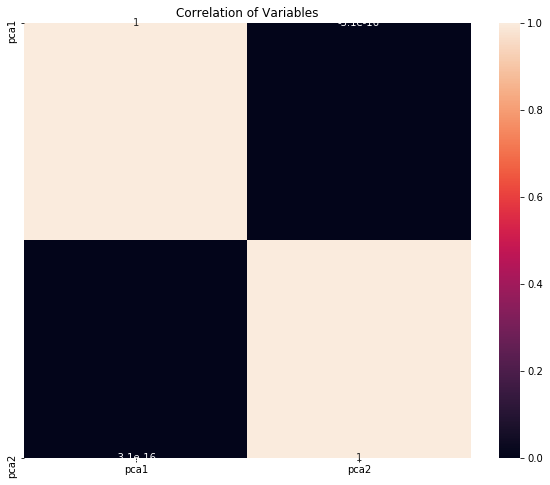

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
pca1: 1.0
pca2: 1.0

0 cases of possible multicollinearity
0 cases of definite multicollinearity

Assumption satisfied

Assumption 4: No Autocorrelation

Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 1.845929540552834
Little to no autocorrelation 

Assumption satisfied

Assumption 5: Homoscedasticity of Error Terms
Residuals should have relative constant variance


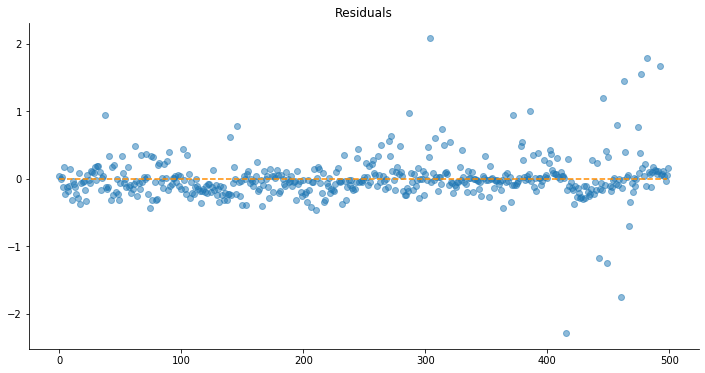

If heteroscedasticity is apparent, confidence intervals and predictions will be affected


In [1316]:
linear_regression_assumptions(pca_X,y9,['pca1','pca2'])


In [1338]:
pd.concat([X9,y9],axis=1).corr().Reach

const                           NaN
Impressions                0.966792
Engaged_Users              0.702474
Fans_Impressions           0.908973
Fans_Reach                 0.929464
Engaged_Fans               0.655977
('Photo', 'Morning')out    0.383856
('Photo', 'Noon')out       0.312749
('Photo', 'Night')out      0.425323
Type_Photo                -0.232446
Type_Status                0.165759
Reach                      1.000000
Name: Reach, dtype: float64

In [1306]:
from  sklearn.decomposition import PCA

In [1333]:
pca=PCA(n_components=2)
pca.fit(X9)
pca.explained_variance_ratio_

array([0.80237899, 0.10779282])

In [1334]:
pca_X=pca.fit_transform(X9)

In [1337]:
pd.DataFrame(pca.components_, columns=X9.columns)

,const,Impressions,Engaged_Users,Fans_Impressions,Fans_Reach,Engaged_Fans,"('Photo', 'Morning')out","('Photo', 'Noon')out","('Photo', 'Night')out",Type_Photo,Type_Status
0,0.0,0.545978,0.363822,0.491205,0.452783,0.340568,0.037112,0.027533,0.038985,-0.044476,0.040328
1,0.0,0.387385,-0.619815,0.270738,0.175850,-0.586688,0.054858,0.029343,0.045054,-0.018895,-0.105261


In [ ]:
## ELDIAS

In [1177]:
dffffff=df_hours.copy()
dffffff['y']=np.exp(np.exp(y8))
dffffff['ypred']=np.exp(np.exp(y_hat))
dffffff['resid']=dffffff.y-dffffff.ypred

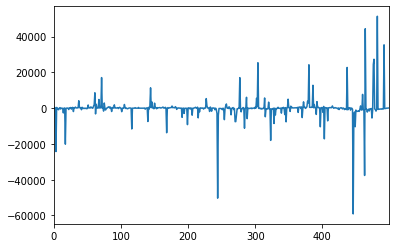

In [1178]:
dffffff.resid.plot()

In [1179]:
df_hours_bis

,Page_likes,Type,Month,Weekday,Hour,Paid,Reach,Impressions,Engaged_Users,Fans_Impressions,...,"('Link', 'Night')out","('Photo', 'Morning')out","('Photo', 'Noon')out","('Photo', 'Night')out","('Status', 'Morning')out","('Status', 'Noon')out","('Status', 'Night')out","('Video', 'Morning')out","('Video', 'Noon')out","('Video', 'Night')out"
0,139441,Photo,12,4,3,0,2752,5091,178,3078,...,0,0,0,0,0,0,0,0,0,0
1,139441,Status,12,3,10,0,10460,19057,1457,11710,...,0,0,0,0,0,0,0,0,0,0
2,139441,Photo,12,3,3,0,2413,4373,177,2812,...,0,0,0,0,0,0,0,0,0,0
3,139441,Photo,12,2,10,1,50128,87991,2211,61027,...,0,1,0,0,0,0,0,0,0,0
4,139441,Photo,12,2,3,0,7244,13594,671,6228,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,85093,Photo,1,7,2,0,4684,7536,733,4750,...,0,0,0,0,0,0,0,0,0,0
496,81370,Photo,1,5,8,0,3480,6229,537,3961,...,0,0,0,0,0,0,0,0,0,0
497,81370,Photo,1,5,2,0,3778,7216,625,4742,...,0,0,0,0,0,0,0,0,0,0
498,81370,Photo,1,4,11,0,4156,7564,626,4534,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
10.822335

In [ ]:
df.